# 🏦 Churn Prediction in HR Data: A Machine Learning-Deep Learning Approach 🤖
___

# New Section

<img src="https://media.licdn.com/dms/image/D4E12AQHx9u8uVrzkHA/article-cover_image-shrink_720_1280/0/1676512042467?e=2147483647&v=beta&t=dyGSrVDd2O4_CJmh4jfasi0baUJ8GhaCzzfqbSLTT_E" alt="Churn Prediction in Banking" width="75%" height="75%">

[Credit](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.linkedin.com%2Fpulse%2Fstop-employee-turnover-chris-timol&psig=AOvVaw3W4yU_TQx7RxGvc_Z58ojS&ust=1699990935532000&source=images&cd=vfe&opi=89978449&ved=0CBQQjhxqFwoTCPi1k_LdwYIDFQAAAAAdAAAAABAv)

# Content
      
<div>
  <ul >
    <li><a href="#part_5">PART - 5 PREPARATION ANALYSIS</a></li>
    <li><a href="#part_6">PART - 6 DEEP LEARNING: ANN ANALYSIS </a></li>
    <li><a href="#part_7">PART - 7 COMPARE MODELS PERFORMANCES </a></li>
    </ul>
</div>

<a id="part_5"></a>

# ✨ PART - 5 Preparation Analysis ✨

## Part 5- Sub Content
<div class="list-group" id="list-tab" role="tablist">
<ul><li><a class="list-group-item list-group-item-action" data-toggle="list" href="#part_1_dataset" role="tab" aria-controls="profile">5.1. Dataset Explanation </a> </li>  
  <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#part_1_importing" role="tab" aria-controls="messages"> 5.2. Importing Libraries</a> </li>
 <li><a class="list-group-item list-group-item-action"  data-toggle="list" href="#part_1_def" role="tab" aria-controls="settings"> 5.3. User Defined Functions (DEFs) </a></li>  
 <li><a class="list-group-item list-group-item-action"  data-toggle="list" href="#part_1_reading" role="tab" aria-controls="settings"> 5.4. Reading & Understanding Data </a> </li>
 <li><a class="list-group-item list-group-item-action"  data-toggle="list" href="#part_1_data_integrity" role="tab" aria-controls="settings"> 5.5. Data Integrity Checks </a> </li>

</ul>
</div>


## 5.1. Dataset Explanation

***Dataset Overview:*** The dataset contains information about employees in a company, focusing on various attributes that can impact employee retention. The features include employee satisfaction, performance evaluation, number of projects, average monthly hours worked, years of experience, work accidents, promotions, department, salary level, and the target variable "left" indicating whether the employee has left the company.

- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

## 5.2. Importing Libraries

In [ ]:
# !pip install scikeras
# !pip install scikit-plot
# !pip install livelossplot
# !pip install optuna

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.compose import ColumnTransformer


from sklearn.metrics import accuracy_score, average_precision_score,\
                            classification_report, confusion_matrix, f1_score, \
                            precision_score, precision_recall_curve, \
                            recall_score, RocCurveDisplay, roc_auc_score, roc_curve

from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV, \
                                    RandomizedSearchCV, train_test_split

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

from sklearn.utils.class_weight import compute_class_weight

from scikitplot.metrics import average_precision_score, plot_roc, precision_recall_curve

from scikeras.wrappers import KerasClassifier

from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.optimizers import Adam, Adadelta, Nadam, RMSprop

# from keras.metrics import BinaryAccuracy, Precision, Recall, F1Score
from livelossplot import PlotLossesKerasTF

import optuna
import pickle

In [ ]:
plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

In [ ]:
# Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [ ]:
# version control
import matplotlib
import sklearn
import tensorflow as tf

!python --version # python version
print()
print("Pandas ", pd.__version__)
print("NumPy ", np.__version__)
print("Matplotlib ", matplotlib.__version__)
print("Seaborn ", sns.__version__)
print("Scikit-Learn ", sklearn.__version__)
print("Tensor-Flow ", tf.__version__)

Python 3.10.12

Pandas  1.5.3
NumPy  1.23.5
Matplotlib  3.7.1
Seaborn  0.12.2
Scikit-Learn  1.2.2
Tensor-Flow  2.14.0


## 5.3. User Defined Functions (DEFs)

In [ ]:
# confusion matrix

def con_matrix(X_train, X_test, y_train, y_test, model, model_name='model'):

  y_pred = (model.predict(X_test) > 0.5).astype('int64')
  print(f'{model_name} - Test Confusion Matrix\n' + '*' * 50)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

  print()

  y_train_pred = (model.predict(X_train) > 0.5).astype('int64')
  print(f'{model_name} - Train Confusion Matrix\n' + '*' * 50)
  print(confusion_matrix(y_train, y_train_pred))
  print(classification_report(y_train, y_train_pred))

# model tuning for cross validation

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units=26, activation="relu", input_dim=X_train.shape[1]))
    classifier.add(Dense(units=13, activation="relu"))
    classifier.add(Dense(units=5, activation="relu"))
    classifier.add(Dense(units=1, activation="sigmoid"))
    classifier.compile(
        optimizer="adam", loss="binary_crossentropy", metrics=['accuracy']
    )
    return classifier



In [ ]:
# for optuna model selection

def create_model(trial):

    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    n_units3 = trial.suggest_int("n_units3", 8, 128)
    n_units4 = trial.suggest_int("n_units4", 8, 128)

    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])

    learning_rate = trial.suggest_loguniform("learning_rate", 1e-6, 1e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(n_units3, activation="relu"))
    model.add(Dense(n_units4, activation="relu"))

    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy",
                  optimizer=optimizer(learning_rate=learning_rate),
                  metrics=[trial_metric]
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.001, 5)
    w1 = trial.suggest_loguniform("w1", 0.001, 5)

    model.fit(X_train,
              y_train,
              validation_data=(X_val, y_val),
              batch_size=batch_size,
              epochs=epochs,
              callbacks=[early_stop],
              class_weight={0: w0, 1: w1},
              verbose=0,
              )

    if len(trial_metric) == 1:
      _, accuracy = model.evaluate(X_train, y_train, verbose=0)
      if accuracy > .86 :   # after this threshold model gets terrible scores for class 0
        accuracy = accuracy * 0
        return accuracy
      else:
        return accuracy

    elif len(trial_metric) == 2:
        _, accuracy, recall = model.evaluate(X_train, y_train, verbose=0)
        return accuracy, recall

In [ ]:
# optuna model fit

def model_fit(params, X_train, y_train, X_val, y_val):
  unit1, unit2, unit3, unit4, optimizer, lr, w0, w1 = best_params.values()

  optuna = Sequential()
  optuna.add(Dense(unit1, activation="relu"))
  optuna.add(Dense(unit2, activation="relu"))
  optuna.add(Dense(unit3, activation="relu"))
  optuna.add(Dense(unit4, activation="relu"))
  optuna.add(Dense(1, activation="sigmoid"))

  opt = optimizer(learning_rate=lr)

  optuna.compile(optimizer=opt, loss="binary_crossentropy", metrics=['accuracy', 'Precision', 'Recall'])

  # train model
  optuna.fit(X_train,
             y_train,
             validation_data=(X_val, y_val),
             batch_size=batch_size,
             epochs=epochs,
             callbacks=[early_stop],
             class_weight={0: w0, 1: w1},
             verbose=1)
  return optuna

## 5.4. Reading & Understanding Data

In [ ]:
# this is not orginal dataset, it has been processed from EDA

df0 = pd.read_csv('HR_Dataset_DL.csv')

In [ ]:
df = df0.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   departments            11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


<a id="part_6"></a>

# ✨ PART - 6 Deep Learning: ANN Analysis ✨

## Part 6- Sub Content
<div class="list-group" id="list-tab" role="tablist">
  <ul>
   <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#part_1_dataset" role="tab" aria-controls="profile">  6.0. Data Preprocessing</a></li>

<ul>

</ul>

  
  <li><a class="list-group-item list-group-item-action"  data-toggle="list" href="#part_5_vanilla" role="tab" aria-controls="settings"> 6.1. Vanilla  ✨</a></li>
  <ul>
 <li><a class="list-group-item list-group-item-action"  data-toggle="list" href="#part_1_data_integrity" role="tab" aria-controls="settings">    6.0.1. Data Integrity Checks </a> </li>
</ul>
  
  <li><a class="list-group-item list-group-item-action"  data-toggle="list" href="#part_5_vanill_LR003" role="tab" aria-controls="settings"> 6.2. Vanilla Learning Rate 0.003  ✨ </a></li>

  <li><a class="list-group-item list-group-item-action"  data-toggle="list" href="#part_5_vanill_LR003ES" role="tab" aria-controls="settings"> 6.3. Vanilla Learning Rate 0.003 Early Stoping  ✨ </a></li>

  <li><a class="list-group-item list-group-item-action"  data-toggle="list" href="#part_5_optuna" role="tab" aria-controls="settings"> 6.4. Optuna   ✨</a></li>


</ul>
</div>

## 6.1. Data Preprocessing

In [ ]:
seed = 42
os.environ["TF_DETERMINISTIC_OPS"] = "1"
keras.utils.set_random_seed(seed)

In [ ]:
df['left'].value_counts(normalize = True)

0   0.834
1   0.166
Name: left, dtype: float64

In [ ]:
X = df.drop(columns = ['left'])
y = df['left']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  stratify=y_train,
                                                  test_size=0.15,
                                                  random_state=seed)

In [ ]:
print("X_train shape", X_train.shape)
print("X_val shape", X_val.shape)
print("X_test shape",X_test.shape)

X_train shape (9172, 9)
X_val shape (1619, 9)
X_test shape (1200, 9)


In [ ]:
print("y_train shape", y_train.shape)
print("y_val shape", y_val.shape)
print("y_test shape",y_test.shape)

y_train shape (9172,)
y_val shape (1619,)
y_test shape (1200,)


In [ ]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary
7024,0.680,0.610,3,134,4,0,0,sales,medium
8697,0.640,0.790,4,274,2,1,0,technical,low
9673,0.220,1.000,6,244,3,0,0,IT,medium
2394,0.480,0.690,4,222,2,0,0,technical,medium
6583,0.820,0.520,5,225,2,0,0,accounting,high


In [ ]:
# ordinal encoding for salary column

ordinal = OrdinalEncoder(categories = [['low', 'medium', 'high']])

X_train['salary'] = ordinal.fit_transform(X_train[['salary']])
X_val['salary'] = ordinal.transform(X_val[['salary']])
X_test  ['salary'] = ordinal.transform(X_test[['salary']])

In [ ]:
X_train.salary.value_counts()

0.000    4396
1.000    4005
2.000     771
Name: salary, dtype: int64

In [ ]:
# onehot encoding for departments columns

encoder = OneHotEncoder(categories='auto',
                        sparse=False,
                        drop='first',
                        handle_unknown="ignore")

transformers = [('dept', encoder, ['departments'])]

col_transformer = ColumnTransformer(transformers=transformers,
                                    remainder=MinMaxScaler())

In [ ]:
# using col_transformer for one hot encoding to train_dataset

transformed_data = pd.DataFrame(col_transformer.fit_transform(X_train))


transformed_data.columns = col_transformer.get_feature_names_out(input_features=X_train.columns )

transformed_data.columns =  [col.split('__')[-1] for col in transformed_data.columns]
X_train = transformed_data
X_train.head()

,departments_RandD,departments_accounting,departments_hr,departments_management,departments_marketing,departments_product_mng,departments_sales,departments_support,departments_technical,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary
0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.648,0.391,0.200,0.178,0.250,0.000,0.000,0.500
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.604,0.672,0.400,0.832,0.000,1.000,0.000,0.000
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.143,1.000,0.800,0.692,0.125,0.000,0.000,0.500
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.429,0.516,0.400,0.589,0.000,0.000,0.000,0.500
4,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.802,0.250,0.600,0.603,0.000,0.000,0.000,1.000


In [ ]:
# using col_transformer for one hot encoding to val_dataset

transformed_data = pd.DataFrame(col_transformer.transform(X_val))


transformed_data.columns = col_transformer.get_feature_names_out(input_features=X_val.columns )

transformed_data.columns =  [col.split('__')[-1] for col in transformed_data.columns]
X_val = transformed_data
X_val.head()

,departments_RandD,departments_accounting,departments_hr,departments_management,departments_marketing,departments_product_mng,departments_sales,departments_support,departments_technical,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.516,0.594,0.200,0.790,0.125,0.000,0.000,0.500
1,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.165,0.313,0.400,0.864,0.625,0.000,0.000,0.500
2,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.330,0.281,0.000,0.164,0.125,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.989,0.328,0.200,0.374,0.250,1.000,0.000,0.500
4,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.363,0.219,0.000,0.201,0.125,0.000,0.000,0.500


In [ ]:
# using col_transformer for one hot encoding to test_dataset

transformed_data = pd.DataFrame(col_transformer.transform(X_test))


transformed_data.columns = col_transformer.get_feature_names_out(input_features=X_test.columns )

transformed_data.columns =  [col.split('__')[-1] for col in transformed_data.columns]
X_test = transformed_data
X_test.head()

,departments_RandD,departments_accounting,departments_hr,departments_management,departments_marketing,departments_product_mng,departments_sales,departments_support,departments_technical,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.560,0.422,0.600,0.799,0.125,0.000,0.000,0.000
1,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.011,0.750,0.600,0.967,0.375,0.000,0.000,0.500
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.901,0.109,0.400,0.098,0.375,1.000,0.000,0.500
3,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.473,0.688,0.200,0.729,0.250,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.747,0.094,0.400,0.009,0.000,0.000,0.000,0.000


In [ ]:
print("X_train shape", X_train.shape)
print("X_val shape", X_val.shape)
print("X_test shape",X_test.shape)

X_train shape (9172, 17)
X_val shape (1619, 17)
X_test shape (1200, 17)


In [ ]:
# converting all label dataset into float32

y_train = y_train.astype('float32')
y_val = y_val.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
batch_size = 64
epochs = 1000
patience = 30

<a id="part_5_vanilla"></a>

## 6.1. Vanilla ✨

<a href="#part_5" class="btn btn-danger btn-lg active" role="button" aria-pressed="true" style="color:black;background-color:#3498DB;">Part - 5</a>
<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;background-color:#3498DB; ">Content</a>

In [ ]:
vanilla = Sequential()

vanilla.add(Dense(26, activation='relu', input_dim=X_train.shape[1])) #17*1,5
vanilla.add(Dense(13, activation='relu'))
vanilla.add(Dense(5, activation='relu'))
vanilla.add(Dense(1, activation='sigmoid'))

vanilla.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

In [ ]:
vanilla.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                468       
                                                                 
 dense_1 (Dense)             (None, 13)                351       
                                                                 
 dense_2 (Dense)             (None, 5)                 70        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 895 (3.50 KB)
Trainable params: 895 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

In [ ]:
print('Balanced weight')
print(f'w0: {class_weights_dict[0]}')
print(f'w1: {class_weights_dict[1]}')

Balanced weight
w0: 0.5995554974506472
w1: 3.011162179908076


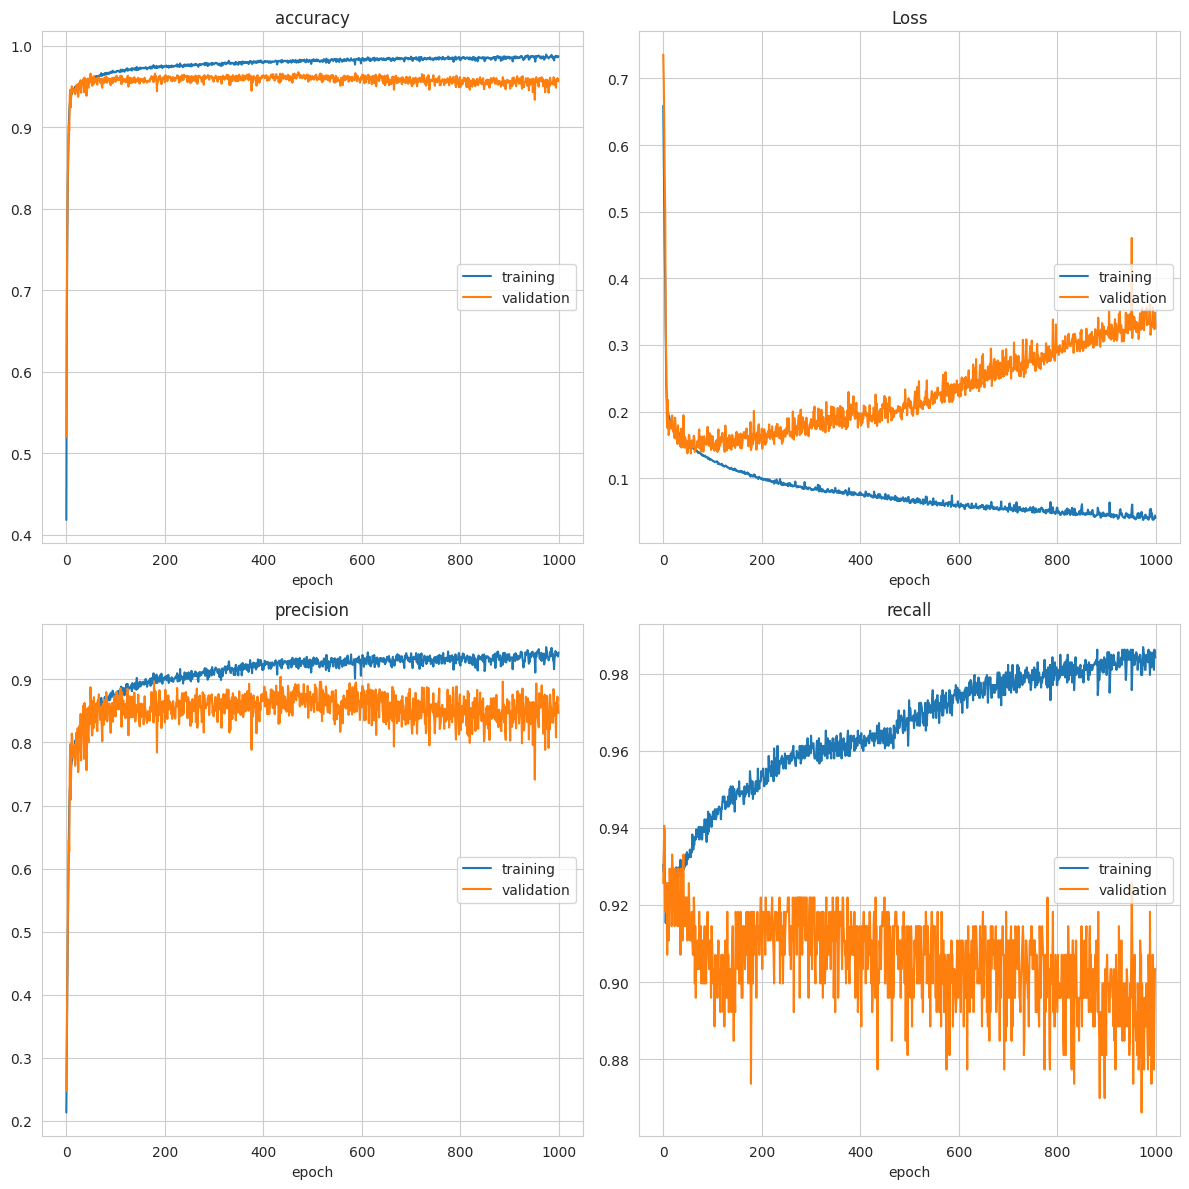

accuracy
	training         	 (min:    0.418, max:    0.989, cur:    0.987)
	validation       	 (min:    0.520, max:    0.968, cur:    0.957)
Loss
	training         	 (min:    0.037, max:    0.659, cur:    0.040)
	validation       	 (min:    0.137, max:    0.736, cur:    0.325)
precision
	training         	 (min:    0.213, max:    0.951, cur:    0.943)
	validation       	 (min:    0.248, max:    0.904, cur:    0.847)
recall
	training         	 (min:    0.915, max:    0.987, cur:    0.984)
	validation       	 (min:    0.866, max:    0.941, cur:    0.903)
144/144 [==============================] - 2s 14ms/step - loss: 0.0405 - accuracy: 0.9875 - precision: 0.9428 - recall: 0.9842 - val_loss: 0.3250 - val_accuracy: 0.9568 - val_precision: 0.8467 - val_recall: 0.9033


In [ ]:
vanilla.fit(x=X_train,
            y=y_train,
            validation_data=(X_val,y_val),
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            callbacks=[PlotLossesKerasTF()],
            class_weight=class_weights_dict )

In [ ]:
vanilla.save('DL_vanilla.h5')

In [ ]:
vanilla_loss_df = pd.DataFrame(vanilla.history.history)
vanilla_loss_df.tail()

,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
995,0.038,0.987,0.942,0.986,0.345,0.959,0.864,0.896
996,0.040,0.986,0.938,0.981,0.336,0.957,0.864,0.877
997,0.040,0.987,0.939,0.986,0.324,0.960,0.873,0.892
998,0.044,0.986,0.936,0.984,0.348,0.959,0.856,0.903
999,0.040,0.987,0.943,0.984,0.325,0.957,0.847,0.903


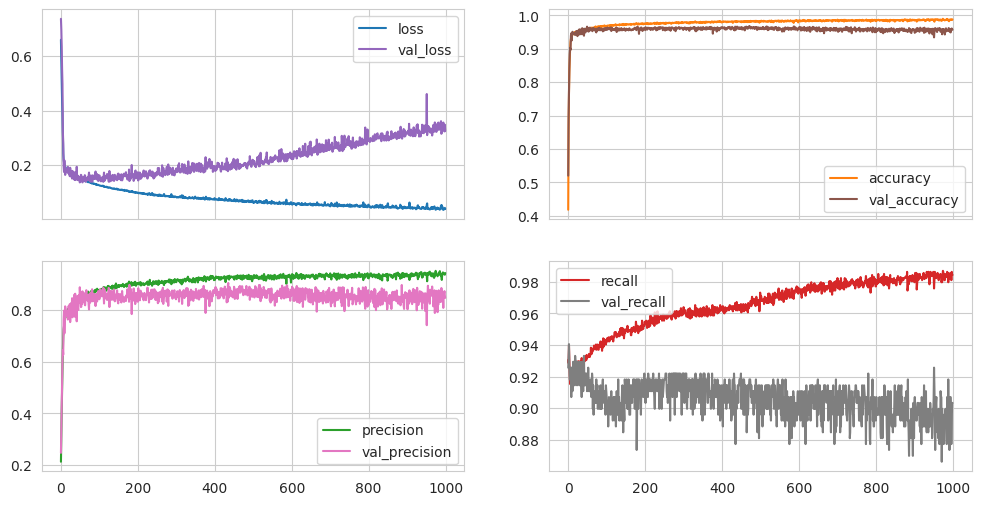

In [ ]:
vanilla_loss_df.plot(subplots=[['loss','val_loss'],
                            ['accuracy','val_accuracy'],
                            ['precision', 'val_precision'],
                            ['recall', 'val_recall']],
                            layout=(2,2),
                            figsize=(12,6));

In [ ]:
loss, accuracy, precision, recall = vanilla.evaluate(X_test, y_test, verbose=0)
print("vanilla test loss: ", loss)
print("vanilla test accuracy: ", accuracy)
print("vanilla test precision ", precision)
print("vanilla test recall: ", recall)

vanilla test loss:  0.30723896622657776
vanilla test accuracy:  0.9616666436195374
vanilla test precision  0.8558139801025391
vanilla test recall:  0.9246231317520142


In [ ]:
loss, accuracy, precision, recall = vanilla.evaluate(X_train, y_train, verbose=0)
print("vanilla train loss: ", loss)
print("vanilla train accuracy: ", accuracy)
print("vanilla train precision ", precision)
print("vanilla train recall: ", recall)

vanilla train loss:  0.04047880694270134
vanilla train accuracy:  0.9865896105766296
vanilla train precision  0.9364089965820312
vanilla train recall:  0.9862114191055298


In [ ]:
con_matrix(X_train, X_test, y_train, y_test, vanilla, 'Vanilla')

38/38 [==============================] - 0s 3ms/step
Vanilla - Test Confusion Matrix
**************************************************
[[970  31]
 [ 15 184]]
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      1001
         1.0       0.86      0.92      0.89       199

    accuracy                           0.96      1200
   macro avg       0.92      0.95      0.93      1200
weighted avg       0.96      0.96      0.96      1200


287/287 [==============================] - 1s 3ms/step
Vanilla - Train Confusion Matrix
**************************************************
[[7547  102]
 [  21 1502]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      7649
         1.0       0.94      0.99      0.96      1523

    accuracy                           0.99      9172
   macro avg       0.97      0.99      0.98      9172
weighted avg       0.99      0.99      0.99      9172



In [ ]:
y_pred_proba1 = vanilla.predict(X_test)
y_pred_proba_train1 = vanilla.predict(X_train)

y_pred1 =  (vanilla.predict(X_test) > .5).astype("int32")
y_pred_train1 = (vanilla.predict(X_train) > .5).astype("int32")

print("Average Test Precision Score:  ", average_precision_score(y_test, y_pred_proba1))
print("Average Train Precision Score: ", average_precision_score(y_train, y_pred_proba_train1))
print("F1 Test Precision Score: ", f1_score(y_test, y_pred1))
print("F1 Train Precision Score:",f1_score(y_train, y_pred_train1))
print("Recall Test Precision Score: ", recall_score(y_test, y_pred1))
print("Recall Train Precision Score:",recall_score(y_train, y_pred_train1))

287/287 [==============================] - 1s 2ms/step
Average Test Precision Score:   0.91087738831655
Average Train Precision Score:  0.9962016678957899
F1 Test Precision Score:  0.8888888888888888
F1 Train Precision Score: 0.9606651742884554
Recall Test Precision Score:  0.9246231155778895
Recall Train Precision Score: 0.9862114248194354


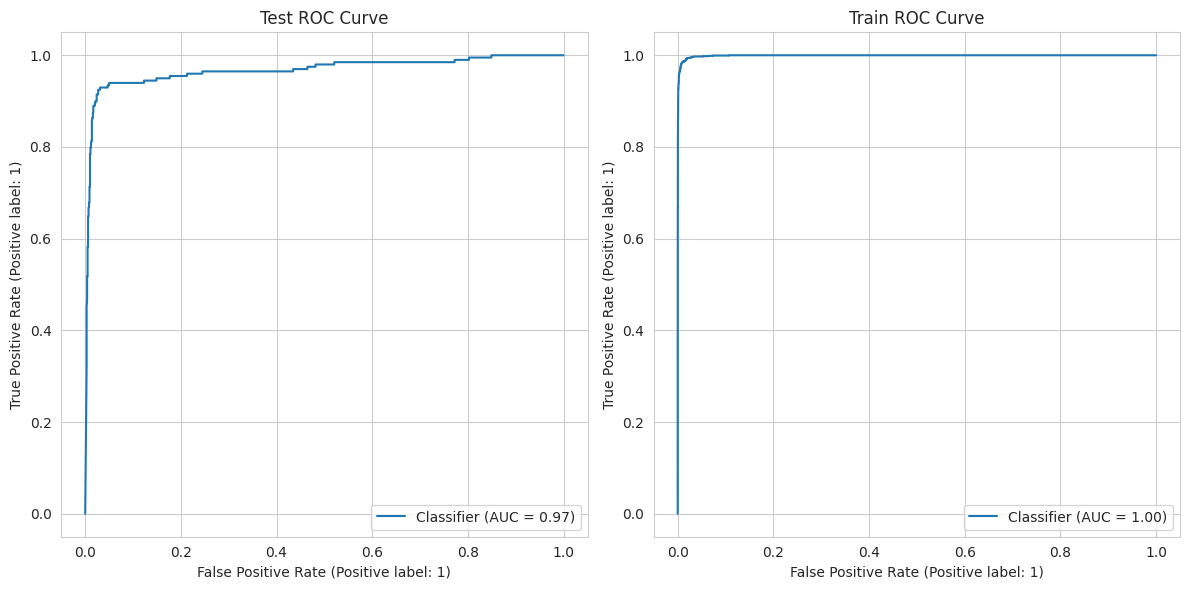

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# ROC curve for the test data
RocCurveDisplay.from_predictions(y_test, y_pred_proba1, ax=axes[0])
axes[0].set_title('Test ROC Curve')

# ROC curve for the train data
RocCurveDisplay.from_predictions(y_train, y_pred_proba_train1, ax=axes[1])
axes[1].set_title('Train ROC Curve')
plt.tight_layout();

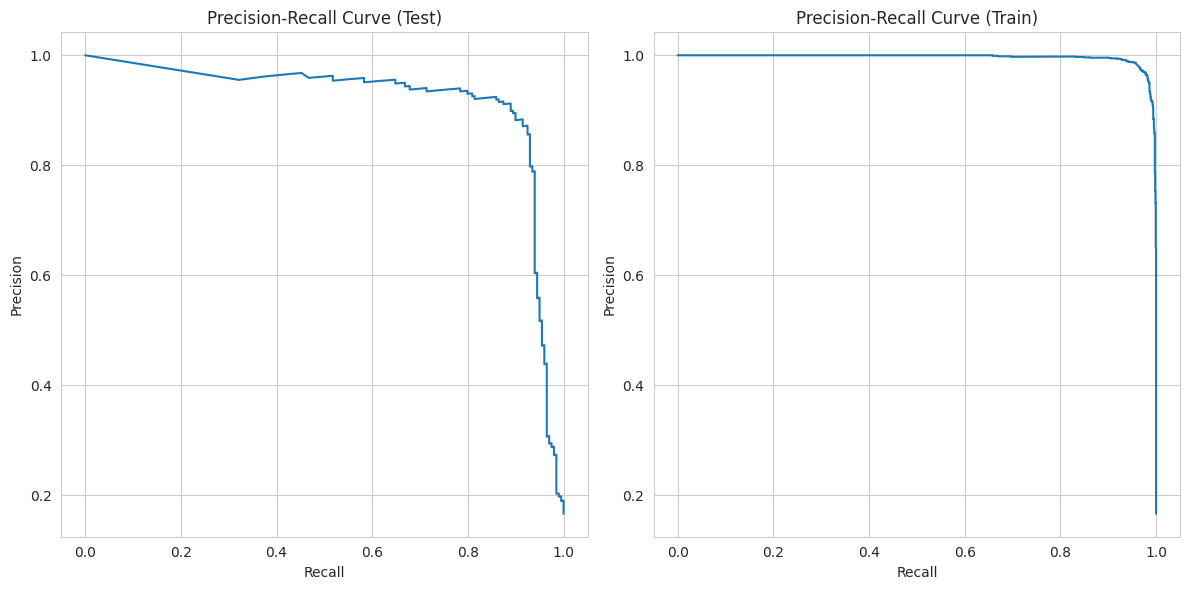

In [ ]:
plt.figure(figsize=(12, 6))

# Precision-recall curve for the test data
precisions_test, recalls_test, thresholds_test = precision_recall_curve(y_test, y_pred_proba1)
plt.subplot(1, 2, 1)  # Arrange two plots side by side, this is the first plot
plt.plot(recalls_test, precisions_test, label='ANN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test)')

# Precision-recall curve for the train data
precisions_train, recalls_train, thresholds_train = precision_recall_curve(y_train, y_pred_proba_train1)
plt.subplot(1, 2, 2)  # Arrange two plots side by side, this is the second plot
plt.plot(recalls_train, precisions_train, label='ANN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Train)')

plt.tight_layout();

### 6.1.1. Vanilla Evaluating and Tuning

In [ ]:
classifier_model = KerasClassifier(
                                    model=build_classifier,
                                    batch_size=batch_size,
                                    epochs=100,
                                    verbose=0)

scores = cross_validate(
    estimator=classifier_model,
    X=X_train,
    y=y_train,
    scoring=["accuracy", "precision", "recall", "f1"],
    cv=10,
    return_train_score=True
)

df_scores_cv = pd.DataFrame(scores, index=range(1, 11)).iloc[:, 2:]

df_scores_cv

,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.968,0.978,0.937,0.963,0.869,0.901,0.902,0.931
2,0.967,0.977,0.907,0.946,0.895,0.915,0.901,0.930
3,0.968,0.974,0.913,0.943,0.895,0.899,0.904,0.920
4,0.973,0.979,0.964,0.974,0.868,0.897,0.913,0.934
5,0.964,0.979,0.910,0.959,0.868,0.914,0.889,0.936
6,0.963,0.979,0.910,0.954,0.862,0.915,0.885,0.934
7,0.968,0.977,0.897,0.957,0.914,0.901,0.906,0.928
8,0.968,0.972,0.897,0.919,0.914,0.910,0.906,0.915
9,0.962,0.975,0.893,0.938,0.875,0.912,0.884,0.925
10,0.966,0.973,0.907,0.935,0.889,0.901,0.898,0.917


In [ ]:
df_scores_summary = pd.DataFrame({
        "test_mean": df_scores_cv.mean().values[[0,2,4,6]],
        "test_std": df_scores_cv.std().values[[0,2,4,6]],
        "train_mean": df_scores_cv.mean().values[[1,3,5,7]],
        "train_std": df_scores_cv.std().values[[1,3,5,7]]
        }, index=["accuracy", "precision", "recall", "f1"])

df_scores_summary


,test_mean,test_std,train_mean,train_std
accuracy,0.967,0.003,0.976,0.003
precision,0.913,0.021,0.949,0.016
recall,0.885,0.019,0.906,0.007
f1,0.899,0.010,0.927,0.007


<a id="part_5_vanill_LR003"></a>

## 6.2. Vanilla Learning Rate 0.003 ✨

<a href="#part_5" class="btn btn-danger btn-lg active" role="button" aria-pressed="true" style="color:black;background-color:#3498DB;">Part - 5</a>
<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;background-color:#3498DB; ">Content</a>

In [ ]:
vanilla_LR_0_003 = Sequential()

vanilla_LR_0_003.add(Dense(26, activation='relu', input_dim=X_train.shape[1])) #17*1,5
vanilla_LR_0_003.add(Dense(13, activation='relu'))
vanilla_LR_0_003.add(Dense(5, activation='relu'))
vanilla_LR_0_003.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=0.003)
vanilla_LR_0_003.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

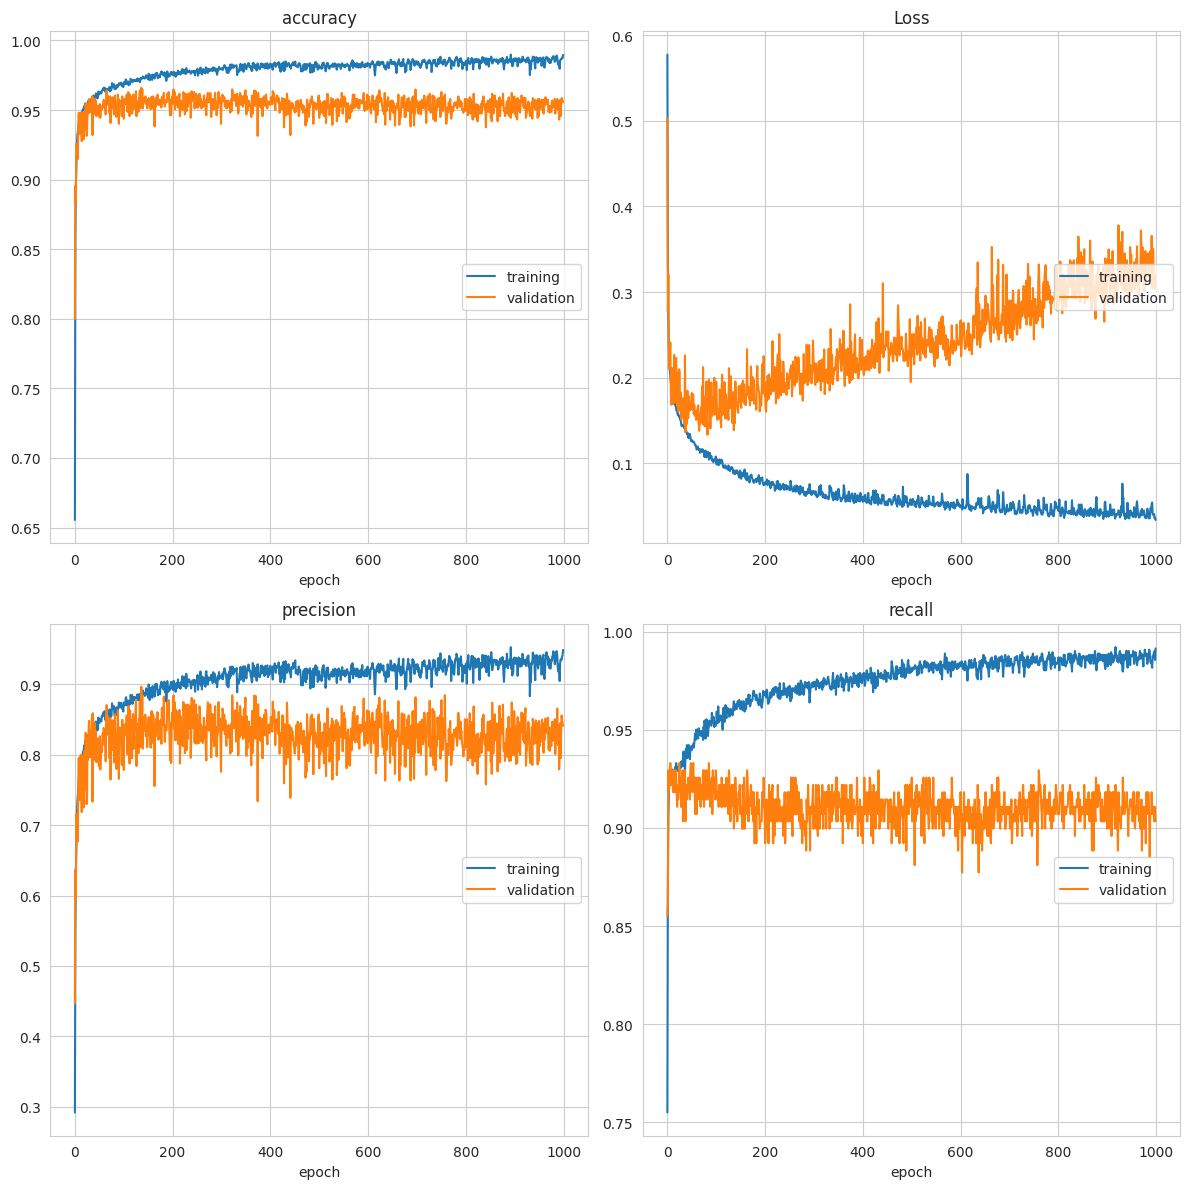

accuracy
	training         	 (min:    0.655, max:    0.990, cur:    0.990)
	validation       	 (min:    0.800, max:    0.966, cur:    0.956)
Loss
	training         	 (min:    0.034, max:    0.577, cur:    0.034)
	validation       	 (min:    0.133, max:    0.503, cur:    0.320)
precision
	training         	 (min:    0.292, max:    0.953, cur:    0.948)
	validation       	 (min:    0.447, max:    0.896, cur:    0.841)
recall
	training         	 (min:    0.755, max:    0.992, cur:    0.991)
	validation       	 (min:    0.855, max:    0.933, cur:    0.903)
144/144 [==============================] - 2s 13ms/step - loss: 0.0336 - accuracy: 0.9896 - precision: 0.9485 - recall: 0.9915 - val_loss: 0.3200 - val_accuracy: 0.9555 - val_precision: 0.8408 - val_recall: 0.9033


In [ ]:
vanilla_LR_0_003.fit(x=X_train,
                     y=y_train,
                     validation_data=(X_val,y_val),
                     batch_size=batch_size,
                     epochs=epochs,
                     verbose=1,
                     callbacks=[PlotLossesKerasTF()],
                     class_weight=class_weights_dict )

In [ ]:
vanilla_LR_0_003.save('DL_vanilla_LR_0_003.h5')

In [ ]:
vanilla_LR_0_003_loss_df = pd.DataFrame(vanilla_LR_0_003.history.history)
vanilla_LR_0_003_loss_df.tail()

,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
995,0.039,0.987,0.934,0.989,0.321,0.955,0.833,0.911
996,0.040,0.987,0.934,0.989,0.319,0.959,0.856,0.903
997,0.036,0.988,0.939,0.990,0.304,0.958,0.848,0.911
998,0.036,0.987,0.942,0.986,0.307,0.957,0.844,0.907
999,0.034,0.990,0.948,0.991,0.320,0.956,0.841,0.903


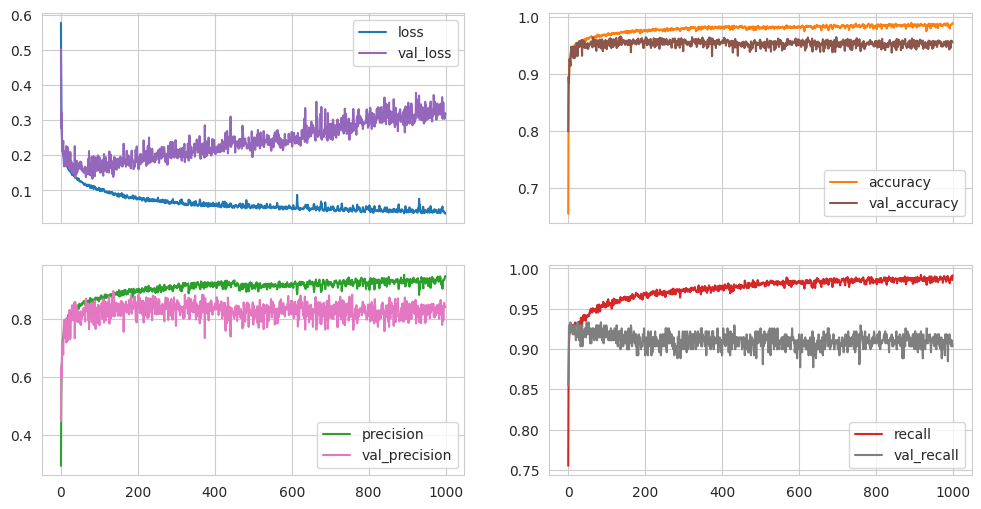

In [ ]:
vanilla_LR_0_003_loss_df.plot(subplots=[['loss','val_loss'],
                                        ['accuracy','val_accuracy'],
                                        ['precision', 'val_precision'],
                                        ['recall', 'val_recall']],
                                        layout=(2,2),
                                        figsize=(12,6));


In [ ]:
loss, accuracy, precision, recall = vanilla_LR_0_003.evaluate(X_test, y_test, verbose=0)
print("vanilla LR 0.003 test loss: ", loss)
print("vanilla LR 0.003 test accuracy: ", accuracy)
print("vanilla LR 0.003 test precision ", precision)
print("vanilla LR 0.003 test recall: ", recall)

vanilla LR 0.003 test loss:  0.2671464681625366
vanilla LR 0.003 test accuracy:  0.9608333110809326
vanilla LR 0.003 test precision  0.8584905862808228
vanilla LR 0.003 test recall:  0.9145728349685669


In [ ]:
loss, accuracy, precision, recall = vanilla_LR_0_003.evaluate(X_train, y_train, verbose=0)
print("vanilla LR 0.003 train loss: ", loss)
print("vanilla LR 0.003 train accuracy: ", accuracy)
print("vanilla LR 0.003 train precision ", precision)
print("vanilla LR 0.003 train recall: ", recall)

vanilla LR 0.003 train loss:  0.03427642583847046
vanilla LR 0.003 train accuracy:  0.9889882206916809
vanilla LR 0.003 train precision  0.9477329850196838
vanilla LR 0.003 train recall:  0.9881812334060669


In [ ]:
con_matrix(X_train, X_test, y_train, y_test, vanilla_LR_0_003, 'vanilla LR 0.003')

38/38 [==============================] - 0s 2ms/step
vanilla LR 0.003 - Test Confusion Matrix
**************************************************
[[971  30]
 [ 17 182]]
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      1001
         1.0       0.86      0.91      0.89       199

    accuracy                           0.96      1200
   macro avg       0.92      0.94      0.93      1200
weighted avg       0.96      0.96      0.96      1200


287/287 [==============================] - 0s 2ms/step
vanilla LR 0.003 - Train Confusion Matrix
**************************************************
[[7566   83]
 [  18 1505]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      7649
         1.0       0.95      0.99      0.97      1523

    accuracy                           0.99      9172
   macro avg       0.97      0.99      0.98      9172
weighted avg       0.99      0.99      0.99      9172



In [ ]:
y_pred_proba2 = vanilla_LR_0_003.predict(X_test)
y_pred_proba_train2 = vanilla_LR_0_003.predict(X_train)

y_pred2 =  (vanilla_LR_0_003.predict(X_test) > .5).astype("int32")
y_pred_train2 =  (vanilla_LR_0_003.predict(X_train) > .5).astype("int32")

print("Average Test Precision Score:  ", average_precision_score(y_test, y_pred_proba2))
print("Average Train Precision Score: ", average_precision_score(y_train, y_pred_proba_train2))
print("F1 Test Precision Score: ", f1_score(y_test, y_pred2))
print("F1 Train Precision Score:",f1_score(y_train, y_pred_train2))
print("Recall Test Precision Score: ", recall_score(y_test, y_pred2))
print("Recall Train Precision Score:",recall_score(y_train, y_pred_train2))

287/287 [==============================] - 1s 2ms/step
Average Test Precision Score:   0.9325566975280212
Average Train Precision Score:  0.9962197967043316
F1 Test Precision Score:  0.8856447688564478
F1 Train Precision Score: 0.9675345548055286
Recall Test Precision Score:  0.914572864321608
Recall Train Precision Score: 0.9881812212738017


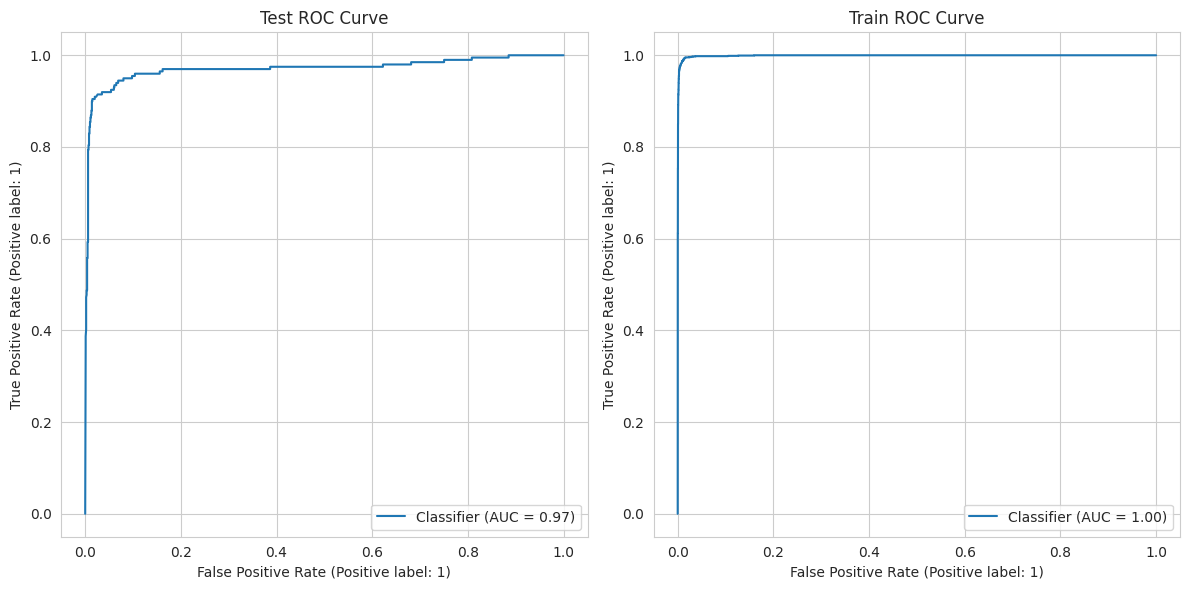

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# ROC curve for the test data
RocCurveDisplay.from_predictions(y_test, y_pred_proba2, ax=axes[0])
axes[0].set_title('Test ROC Curve')

# ROC curve for the train data
RocCurveDisplay.from_predictions(y_train, y_pred_proba_train2, ax=axes[1])
axes[1].set_title('Train ROC Curve')
plt.tight_layout();


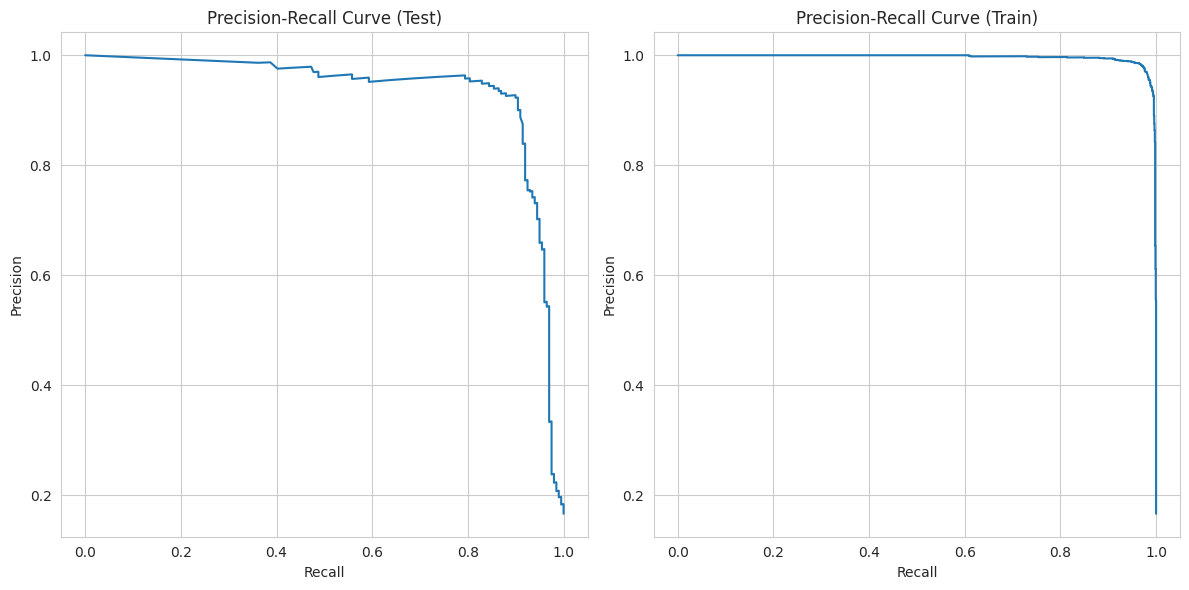

In [ ]:
plt.figure(figsize=(12, 6))

# Precision-recall curve for the test data
precisions_test, recalls_test, thresholds_test = precision_recall_curve(y_test, y_pred_proba2)
plt.subplot(1, 2, 1)  # Arrange two plots side by side, this is the first plot
plt.plot(recalls_test, precisions_test, label='ANN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test)')

# Precision-recall curve for the train data
precisions_train, recalls_train, thresholds_train = precision_recall_curve(y_train, y_pred_proba_train2)
plt.subplot(1, 2, 2)  # Arrange two plots side by side, this is the second plot
plt.plot(recalls_train, precisions_train, label='ANN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Train)')

plt.tight_layout();

<a id="part_5_vanill_LR003_ES"></a>

## 6.3. Vanilla Learning Rate 0.003 Early Stopping ✨

<a href="#part_5" class="btn btn-danger btn-lg active" role="button" aria-pressed="true" style="color:black;background-color:#3498DB;">Part - 5</a>
<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;background-color:#3498DB; ">Content</a>

In [ ]:
vanilla_LR_0_003_ES = Sequential()

vanilla_LR_0_003_ES.add(Dense(26, activation='relu', input_dim=X_train.shape[1])) #17*1,5
vanilla_LR_0_003_ES.add(Dense(13, activation='relu'))
vanilla_LR_0_003_ES.add(Dense(5, activation='relu'))
vanilla_LR_0_003_ES.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=0.003)
vanilla_LR_0_003_ES.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

In [ ]:
early_stop = EarlyStopping(monitor="val_loss", mode="auto", verbose=1, patience=patience, restore_best_weights=True)

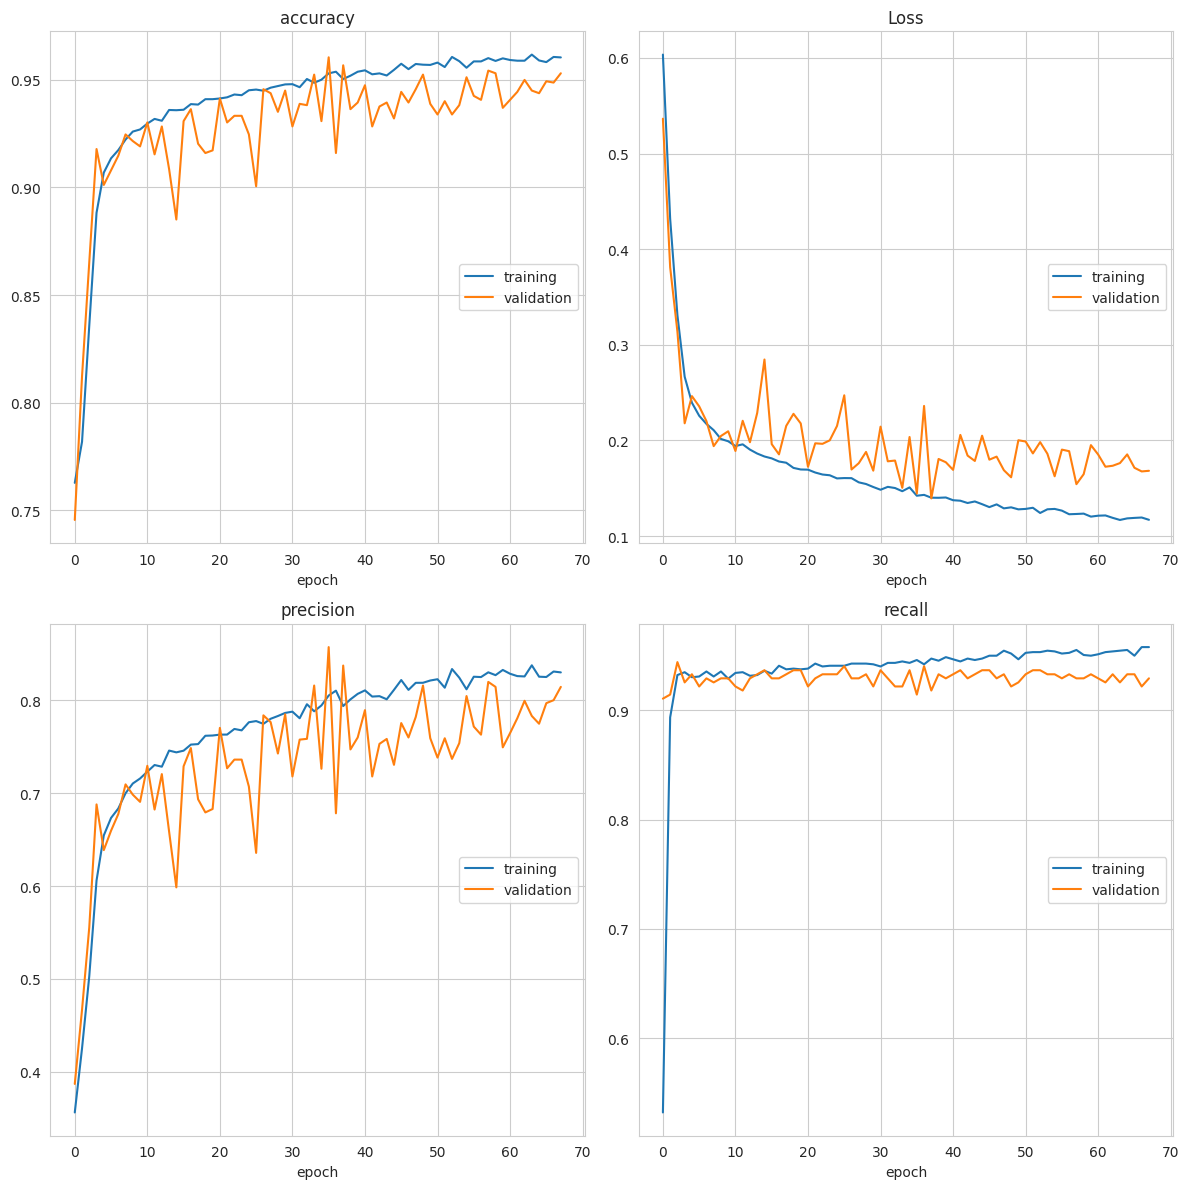

accuracy
	training         	 (min:    0.763, max:    0.962, cur:    0.960)
	validation       	 (min:    0.746, max:    0.960, cur:    0.953)
Loss
	training         	 (min:    0.117, max:    0.603, cur:    0.117)
	validation       	 (min:    0.139, max:    0.536, cur:    0.168)
precision
	training         	 (min:    0.356, max:    0.838, cur:    0.830)
	validation       	 (min:    0.387, max:    0.857, cur:    0.814)
recall
	training         	 (min:    0.532, max:    0.958, cur:    0.958)
	validation       	 (min:    0.911, max:    0.944, cur:    0.929)
144/144 [==============================] - 2s 13ms/step - loss: 0.1170 - accuracy: 0.9604 - precision: 0.8299 - recall: 0.9580 - val_loss: 0.1683 - val_accuracy: 0.9531 - val_precision: 0.8143 - val_recall: 0.9294
Epoch 68: early stopping


In [ ]:
vanilla_LR_0_003_ES.fit(x=X_train,
                        y=y_train,
                        validation_data=(X_val,y_val),
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        callbacks=[early_stop, PlotLossesKerasTF()],
                        class_weight=class_weights_dict )

In [ ]:
vanilla_LR_0_003_ES.save('DL_vanilla_LR_0_003_ES.h5')

In [ ]:
vanilla_LR_0_003_ES_loss_df = pd.DataFrame(vanilla_LR_0_003_ES.history.history)
vanilla_LR_0_003_ES_loss_df.tail()

,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
63,0.117,0.962,0.838,0.955,0.176,0.945,0.783,0.926
64,0.118,0.959,0.825,0.955,0.185,0.944,0.775,0.933
65,0.119,0.958,0.825,0.950,0.171,0.949,0.797,0.933
66,0.119,0.961,0.831,0.958,0.168,0.949,0.800,0.922
67,0.117,0.960,0.830,0.958,0.168,0.953,0.814,0.929


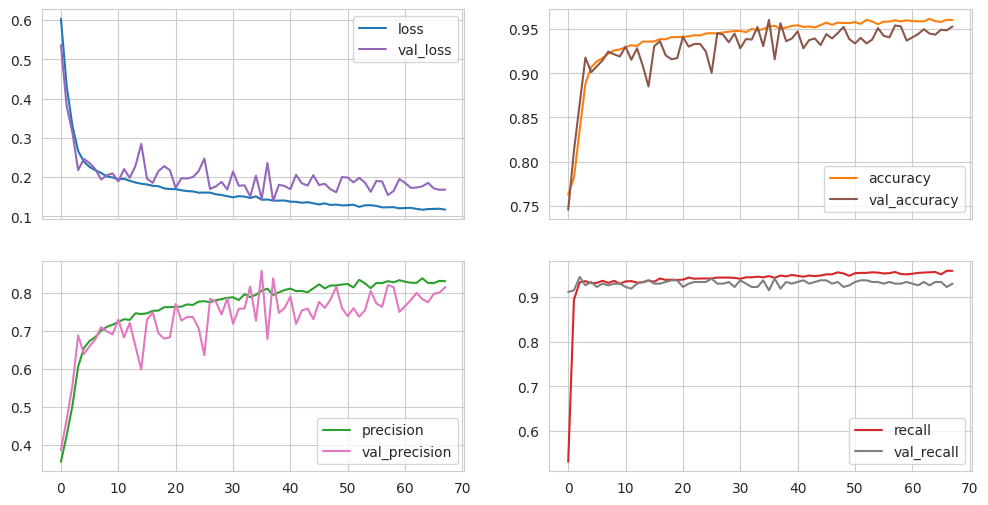

In [ ]:
vanilla_LR_0_003_ES_loss_df.plot(subplots=[['loss','val_loss'],
                                           ['accuracy','val_accuracy'],
                                           ['precision', 'val_precision'],
                                           ['recall', 'val_recall']],
                                           layout=(2,2),
                                           figsize=(12,6));

In [ ]:
loss, accuracy, precision, recall = vanilla_LR_0_003_ES.evaluate(X_test, y_test, verbose=0)
print("vanilla LR 0.03 early stop test loss: ", loss)
print("vanilla LR 0.03 early stop test accuracy: ", accuracy)
print("vanilla LR 0.03 early stop test precision ", precision)
print("vanilla LR 0.03 early stop test recall: ", recall)

vanilla LR 0.03 early stop test loss:  0.13285411894321442
vanilla LR 0.03 early stop test accuracy:  0.9608333110809326
vanilla LR 0.03 early stop test precision  0.855140209197998
vanilla LR 0.03 early stop test recall:  0.9195979833602905


In [ ]:
loss, accuracy, precision, recall = vanilla_LR_0_003_ES.evaluate(X_train, y_train, verbose=0)
print("vanilla LR 0.03 early stop train loss: ", loss)
print("vanilla LR 0.03 early stop train accuracy: ", accuracy)
print("vanilla LR 0.03 early stop train precision ", precision)
print("vanilla LR 0.03 early stop train recall: ", recall)

vanilla LR 0.03 early stop train loss:  0.09957735240459442
vanilla LR 0.03 early stop train accuracy:  0.9674007892608643
vanilla LR 0.03 early stop train precision  0.8858764171600342
vanilla LR 0.03 early stop train recall:  0.9225213527679443


In [ ]:
con_matrix(X_train, X_test, y_train, y_test, vanilla_LR_0_003_ES, 'Vanilla LR 0.003 Early Stop')

38/38 [==============================] - 0s 2ms/step
Vanilla LR 0.003 Early Stop - Test Confusion Matrix
**************************************************
[[970  31]
 [ 16 183]]
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      1001
         1.0       0.86      0.92      0.89       199

    accuracy                           0.96      1200
   macro avg       0.92      0.94      0.93      1200
weighted avg       0.96      0.96      0.96      1200


287/287 [==============================] - 0s 2ms/step
Vanilla LR 0.003 Early Stop - Train Confusion Matrix
**************************************************
[[7468  181]
 [ 118 1405]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      7649
         1.0       0.89      0.92      0.90      1523

    accuracy                           0.97      9172
   macro avg       0.94      0.95      0.94      9172
weighted avg       0.97      0.97  

In [ ]:
y_pred_proba3 = vanilla_LR_0_003_ES.predict(X_test)
y_pred_proba_train3 = vanilla_LR_0_003_ES.predict(X_train)

y_pred3 =  (vanilla_LR_0_003_ES.predict(X_test) > .5).astype("int32")
y_pred_train3 =  (vanilla_LR_0_003_ES.predict(X_train) > .5).astype("int32")

print("Average Test Precision Score:  ", average_precision_score(y_test, y_pred_proba3))
print("Average Train Precision Score: ", average_precision_score(y_train, y_pred_proba_train3))
print("F1 Test Precision Score: ", f1_score(y_test, y_pred3))
print("F1 Train Precision Score:",f1_score(y_train, y_pred_train3))
print("Recall Test Precision Score: ", recall_score(y_test, y_pred3))
print("Recall Train Precision Score:",recall_score(y_train, y_pred_train3))

287/287 [==============================] - 0s 2ms/step
Average Test Precision Score:   0.9384333402868799
Average Train Precision Score:  0.955034602630864
F1 Test Precision Score:  0.8861985472154965
F1 Train Precision Score: 0.9038275972981666
Recall Test Precision Score:  0.9195979899497487
Recall Train Precision Score: 0.922521339461589


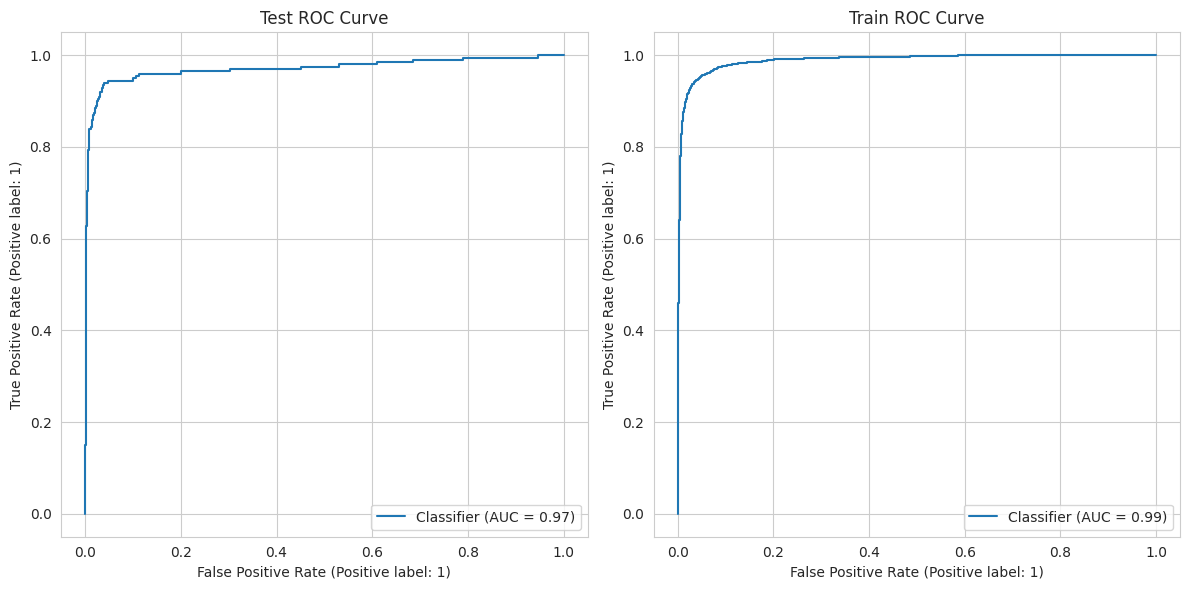

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# ROC curve for the test data
RocCurveDisplay.from_predictions(y_test, y_pred_proba3, ax=axes[0])
axes[0].set_title('Test ROC Curve')

# ROC curve for the train data
RocCurveDisplay.from_predictions(y_train, y_pred_proba_train3, ax=axes[1])
axes[1].set_title('Train ROC Curve')
plt.tight_layout();

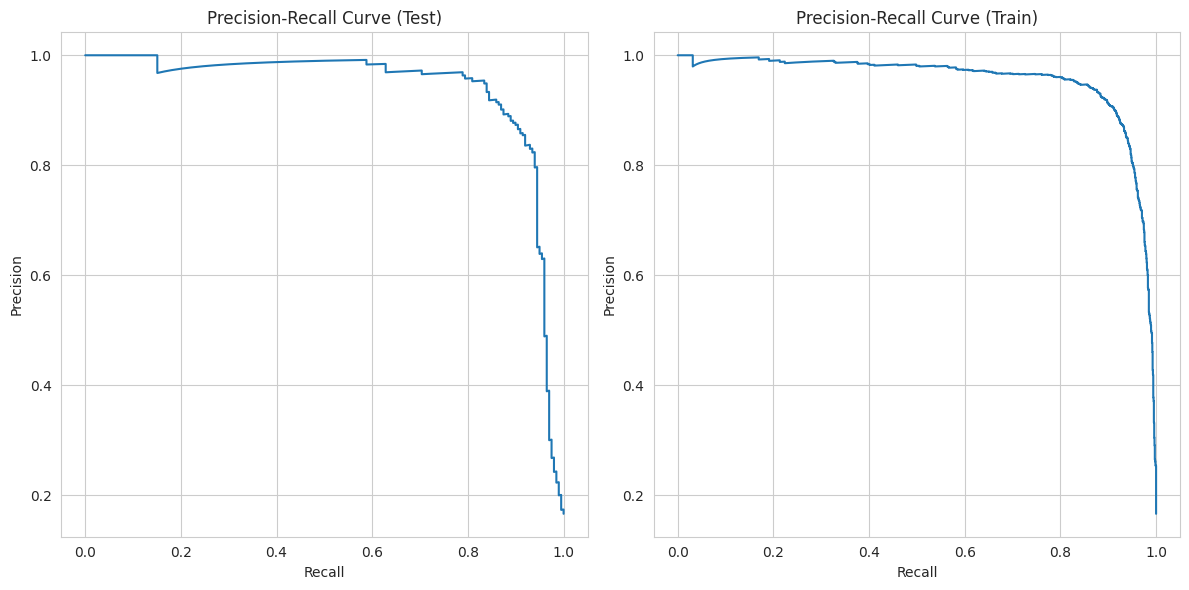

In [ ]:
plt.figure(figsize=(12, 6))

# Precision-recall curve for the test data
precisions_test, recalls_test, thresholds_test = precision_recall_curve(y_test, y_pred_proba3)
plt.subplot(1, 2, 1)  # Arrange two plots side by side, this is the first plot
plt.plot(recalls_test, precisions_test, label='ANN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test)')

# Precision-recall curve for the train data
precisions_train, recalls_train, thresholds_train = precision_recall_curve(y_train, y_pred_proba_train3)
plt.subplot(1, 2, 2)  # Arrange two plots side by side, this is the second plot
plt.plot(recalls_train, precisions_train, label='ANN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Train)')

plt.tight_layout();

<a id="part_5_optuna"></a>

## 6.4. Optuna  ✨


<a href="#part_5" class="btn btn-danger btn-lg active" role="button" aria-pressed="true" style="color:black;background-color:#3498DB;">Part - 5</a>
<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;background-color:#3498DB; ">Content</a>

In [ ]:
trial_metric = ['accuracy', 'Recall']

In [ ]:
if len(trial_metric) == 1:
    # single value optimization
    study = optuna.create_study(direction="maximize") # accuracy

# multiple value optimization
elif len(trial_metric) == 2:
    study = optuna.create_study(directions=["maximize", "maximize"])

study.optimize(objective, n_trials=10, show_progress_bar = True)

[I 2023-11-27 08:49:12,943] A new study created in memory with name: no-name-62a71cf7-4369-4905-b808-aa14055a6eb6


  0%|          | 0/10 [00:00<?, ?it/s]

Restoring model weights from the end of the best epoch: 87.
Epoch 117: early stopping
[I 2023-11-27 08:50:06,340] Trial 0 finished with values: [0.9660924673080444, 0.7977675795555115] and parameters: {'n_units1': 47, 'n_units2': 91, 'n_units3': 29, 'n_units4': 69, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.009516316390714147, 'w0': 1.3127955200256611, 'w1': 0.02401777042259833}. 
[I 2023-11-27 08:58:30,231] Trial 1 finished with values: [0.8835586309432983, 0.4589625597000122] and parameters: {'n_units1': 114, 'n_units2': 8, 'n_units3': 114, 'n_units4': 62, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 1.5727957487797862e-06, 'w0': 0.002489300918117918, 'w1': 0.0018544171044489696}. 
Restoring model weights from the end of the best epoch: 19.
Epoch 49: early stopping
[I 2023-11-27 08:59:12,969] Trial 2 finished with values: [0.8339511752128601, 0.0] and parameters: {'n_units1': 103, 'n_units2': 67, 'n_units3': 83, 'n_units4': 12

In [ ]:
best_trials = study.best_trials
best_params_list = [trial.params for trial in best_trials]
best_params_list

[{'n_units1': 85,
  'n_units2': 97,
  'n_units3': 29,
  'n_units4': 10,
  'optimizer': keras.src.optimizers.adadelta.Adadelta,
  'learning_rate': 0.07013217851373006,
  'w0': 0.009437581839060412,
  'w1': 1.042817635497103},
 {'n_units1': 66,
  'n_units2': 93,
  'n_units3': 104,
  'n_units4': 25,
  'optimizer': keras.src.optimizers.adadelta.Adadelta,
  'learning_rate': 0.00026504188311975423,
  'w0': 0.010422548336828773,
  'w1': 3.857265898914316},
 {'n_units1': 98,
  'n_units2': 96,
  'n_units3': 41,
  'n_units4': 59,
  'optimizer': keras.src.optimizers.adam.Adam,
  'learning_rate': 0.08285918021550093,
  'w0': 0.004755225397898859,
  'w1': 2.3772475267650592},
 {'n_units1': 72,
  'n_units2': 34,
  'n_units3': 16,
  'n_units4': 13,
  'optimizer': keras.src.optimizers.rmsprop.RMSprop,
  'learning_rate': 0.000375821142488931,
  'w0': 0.5019737775357155,
  'w1': 0.6318714392969568}]

In [ ]:
best_trials = study.best_trials
print("accuracy, recall")
for trial in best_trials:
    print(trial.values)

accuracy, recall
[0.1660488396883011, 1.0]
[0.17564326524734497, 0.966513454914093]
[0.1660488396883011, 1.0]
[0.9771042466163635, 0.9152987599372864]


In [ ]:
selected_trial = int(input("select the trial:"))
if len(trial_metric) == 1:
    # This is for single value optimization
    best_params = study.best_params
else:
    # this is for multiple value optimization
    best_params = best_trials[selected_trial].params
best_params

select the trial:3


{'n_units1': 72,
 'n_units2': 34,
 'n_units3': 16,
 'n_units4': 13,
 'optimizer': keras.src.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.000375821142488931,
 'w0': 0.5019737775357155,
 'w1': 0.6318714392969568}

In [ ]:
optuna.visualization.plot_param_importances(study)

### 6.4.1. Using Optuna Best Params

In [ ]:
optuna = model_fit(params=best_params, X_train=X_train, y_train=y_train, X_val= X_val, y_val = y_val)

Epoch 1/1000
144/144 [==============================] - 3s 9ms/step - loss: 0.2762 - accuracy: 0.8263 - precision: 0.1635 - recall: 0.0112 - val_loss: 0.4246 - val_accuracy: 0.8338 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/1000
144/144 [==============================] - 1s 6ms/step - loss: 0.2263 - accuracy: 0.8391 - precision: 0.8615 - recall: 0.0368 - val_loss: 0.3847 - val_accuracy: 0.8511 - val_precision: 0.8889 - val_recall: 0.1190
Epoch 3/1000
144/144 [==============================] - 1s 7ms/step - loss: 0.2055 - accuracy: 0.8585 - precision: 0.7863 - recall: 0.2029 - val_loss: 0.3568 - val_accuracy: 0.8437 - val_precision: 0.5930 - val_recall: 0.1896
Epoch 4/1000
144/144 [==============================] - 1s 7ms/step - loss: 0.1871 - accuracy: 0.8565 - precision: 0.6494 - recall: 0.2955 - val_loss: 0.3284 - val_accuracy: 0.8542 - val_precision: 0.6078 - val_recall: 0.3457
Epoch 5/1000
144/144 [==============================] - 1s 6ms/step - loss: 0.1663 - acc

In [ ]:
optuna.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 72)                1296      
                                                                 
 dense_103 (Dense)           (None, 34)                2482      
                                                                 
 dense_104 (Dense)           (None, 16)                560       
                                                                 
 dense_105 (Dense)           (None, 13)                221       
                                                                 
 dense_106 (Dense)           (None, 1)                 14        
                                                                 
Total params: 4573 (17.86 KB)
Trainable params: 4573 (17.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optuna.save('DL_optuna.h5')

In [ ]:
optuna_loss_df = pd.DataFrame(optuna.history.history)
optuna_loss_df.tail()

,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
108,0.044,0.979,0.957,0.913,0.108,0.971,0.930,0.892
109,0.044,0.980,0.960,0.915,0.114,0.970,0.920,0.900
110,0.044,0.979,0.955,0.917,0.109,0.972,0.938,0.892
111,0.044,0.979,0.957,0.917,0.118,0.968,0.910,0.900
112,0.044,0.980,0.958,0.920,0.118,0.968,0.906,0.900


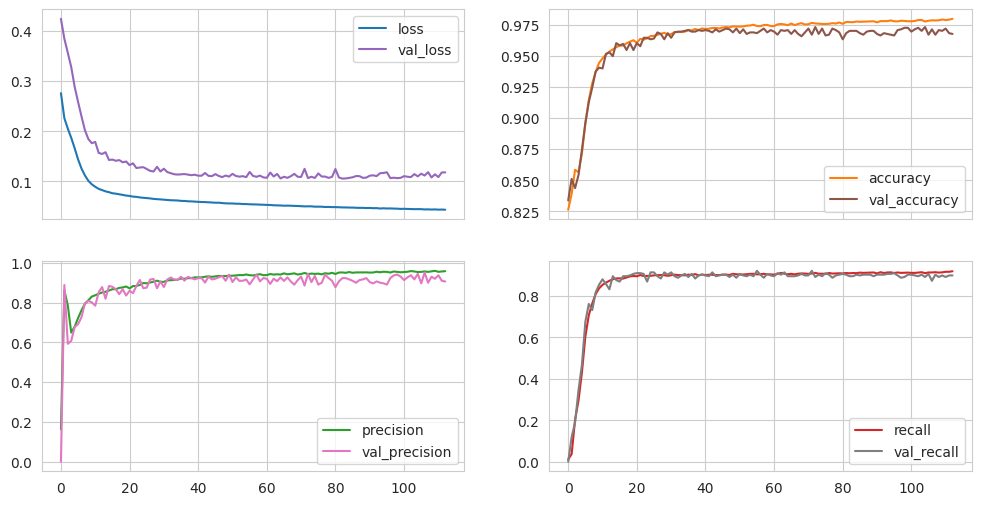

In [ ]:
# optuna_loss_df.plot()
optuna_loss_df.plot(subplots=[['loss','val_loss'],
                            ['accuracy','val_accuracy'],
                            ['precision', 'val_precision'],
                            ['recall', 'val_recall']],
                            layout=(2,2),
                            figsize=(12,6));

In [ ]:
loss, accuracy, precision, recall = optuna.evaluate(X_test, y_test, verbose=0)
print("optuna test loss: ", loss)
print("optuna test accuracy: ", accuracy)
print("optuna test precision ", precision)
print("optuna test recall: ", recall)

optuna test loss:  0.08173955976963043
optuna test accuracy:  0.9783333539962769
optuna test precision  0.9481865167617798
optuna test recall:  0.9195979833602905


In [ ]:
loss, accuracy, precision, recall = optuna.evaluate(X_train, y_train, verbose=0)
print("optuna train loss: ", loss)
print("optuna train accuracy: ", accuracy)
print("optuna train precision ", precision)
print("optuna train recall: ", recall)

optuna train loss:  0.07933439314365387
optuna train accuracy:  0.9788486957550049
optuna train precision  0.9604989886283875
optuna train recall:  0.9100459814071655


In [ ]:
con_matrix(X_train, X_test, y_train, y_test, optuna, 'Optuna')

38/38 [==============================] - 0s 2ms/step
Optuna - Test Confusion Matrix
**************************************************
[[991  10]
 [ 16 183]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1001
         1.0       0.95      0.92      0.93       199

    accuracy                           0.98      1200
   macro avg       0.97      0.95      0.96      1200
weighted avg       0.98      0.98      0.98      1200


287/287 [==============================] - 1s 3ms/step
Optuna - Train Confusion Matrix
**************************************************
[[7592   57]
 [ 137 1386]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      7649
         1.0       0.96      0.91      0.93      1523

    accuracy                           0.98      9172
   macro avg       0.97      0.95      0.96      9172
weighted avg       0.98      0.98      0.98      9172



In [ ]:
y_pred_proba4 = optuna.predict(X_test)
y_pred_proba_train4 = optuna.predict(X_train)

y_pred4 =  (optuna.predict(X_test) > .5).astype("int32")
y_pred_train4 =  (optuna.predict(X_train) > .5).astype("int32")

print("Average Test Precision Score:  ", average_precision_score(y_test, y_pred_proba4))
print("Average Train Precision Score: ", average_precision_score(y_train, y_pred_proba_train4))
print("F1 Test Precision Score: ", f1_score(y_test, y_pred4))
print("F1 Train Precision Score:",f1_score(y_train, y_pred_train4))
print("Recall Test Precision Score: ", recall_score(y_test, y_pred4))
print("Recall Train Precision Score:",recall_score(y_train, y_pred_train4))

287/287 [==============================] - 1s 3ms/step
Average Test Precision Score:   0.9654377770942394
Average Train Precision Score:  0.9649199645746965
F1 Test Precision Score:  0.9336734693877552
F1 Train Precision Score: 0.9345920431557654
Recall Test Precision Score:  0.9195979899497487
Recall Train Precision Score: 0.9100459619172685


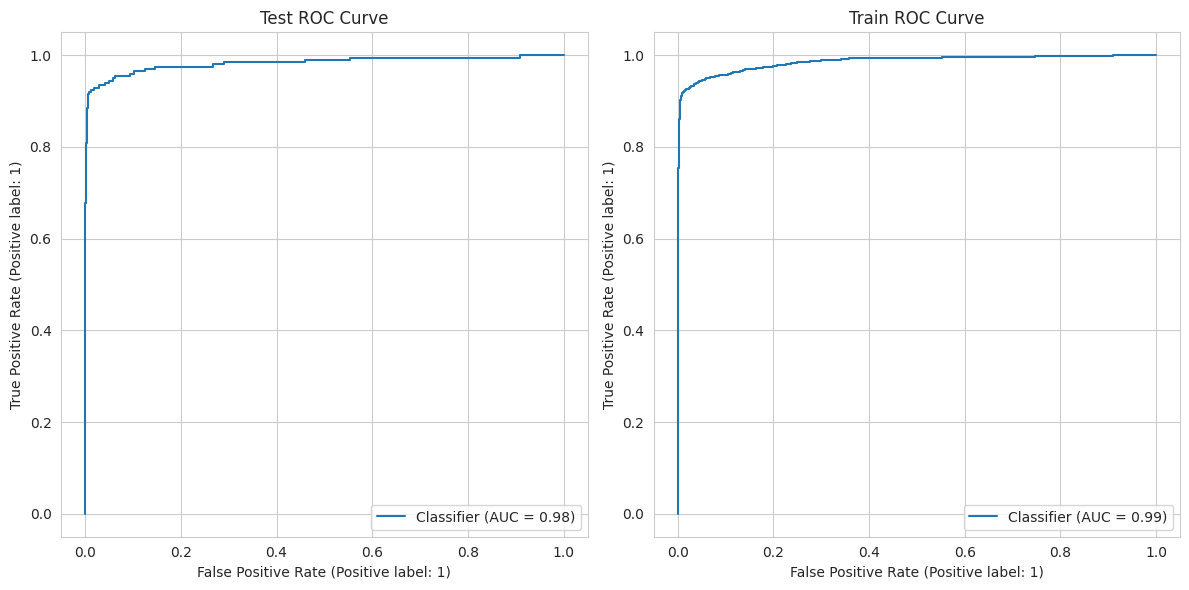

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# ROC curve for the test data
RocCurveDisplay.from_predictions(y_test, y_pred_proba4, ax=axes[0])
axes[0].set_title('Test ROC Curve')

# ROC curve for the train data
RocCurveDisplay.from_predictions(y_train, y_pred_proba_train4, ax=axes[1])
axes[1].set_title('Train ROC Curve')
plt.tight_layout();

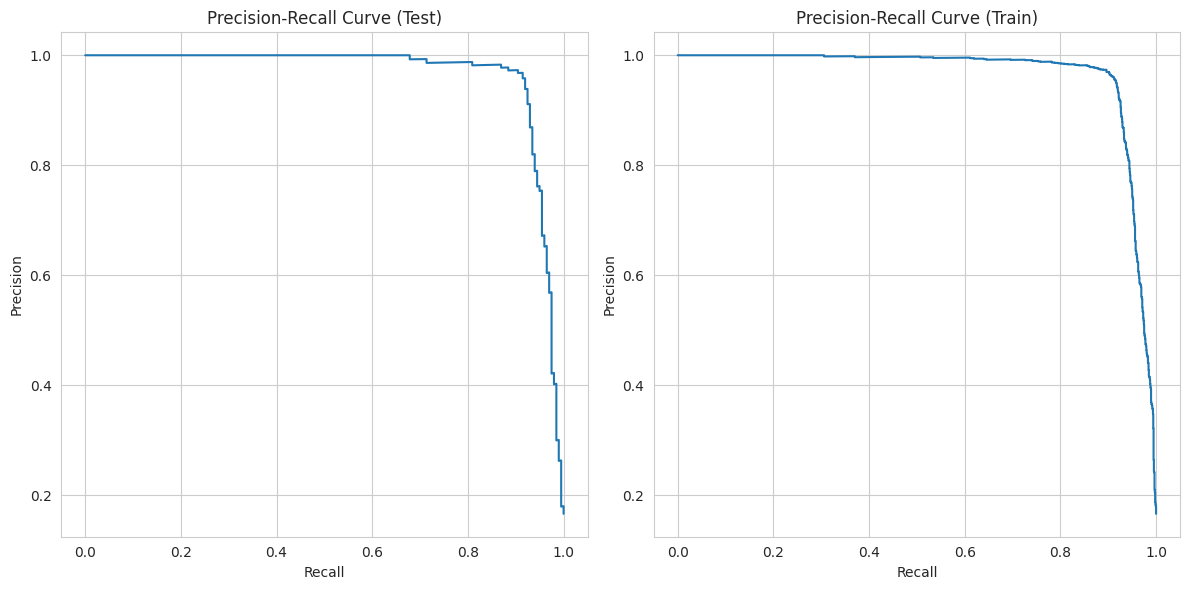

In [ ]:
plt.figure(figsize=(12, 6))

# Precision-recall curve for the test data
precisions_test, recalls_test, thresholds_test = precision_recall_curve(y_test, y_pred_proba4)
plt.subplot(1, 2, 1)  # Arrange two plots side by side, this is the first plot
plt.plot(recalls_test, precisions_test, label='ANN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test)')

# Precision-recall curve for the train data
precisions_train, recalls_train, thresholds_train = precision_recall_curve(y_train, y_pred_proba_train4)
plt.subplot(1, 2, 2)  # Arrange two plots side by side, this is the second plot
plt.plot(recalls_train, precisions_train, label='ANN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Train)')

plt.tight_layout();

# ✨ PART - 7 Compare Models Performances ✨
- Compare model performances according to metrics you choose for the problem.

In [ ]:
vanilla = load_model('DL_vanilla.h5')
vanilla_LR_0_003 = load_model('DL_vanilla_LR_0_003.h5')
vanilla_LR_0_003_ES = load_model('DL_vanilla_LR_0_003_ES.h5')
optuna = load_model('DL_optuna.h5')

models = [vanilla, vanilla_LR_0_003, vanilla_LR_0_003_ES, optuna]
model_names = ['ANN Vanilla', 'ANN Vanilla LR 0.003', 'ANN Vanilla LR 0.003 ES','ANN Optuna' ]


compare = pd.DataFrame(columns=['Model', 'AUC', 'Accuracy', 'Precision','Recall'])



for model, model_name in zip(models, model_names):
    # y_pred = model.predict(X_test)
    y_pred_proba = model.predict(X_test, verbose=0)
    y_pred =(y_pred_proba > 0.5).astype("int32")

    auc_score = roc_auc_score(y_test, y_pred_proba)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    ap = average_precision_score(y_test, y_pred_proba)

    compare = compare.append({'Model': model_name,
                              'AUC': auc_score,
                              'Accuracy': accuracy,
                              'Precision': precision,
                              'Recall': recall,
                              'F1 Score': f1,
                              'AP': ap}, ignore_index=True)

compare

,Model,AUC,Accuracy,Precision,Recall,F1 Score,AP
0,ANN Vanilla,0.968,0.962,0.856,0.925,0.889,0.911
1,ANN Vanilla LR 0.003,0.971,0.961,0.858,0.915,0.886,0.933
2,ANN Vanilla LR 0.003 ES,0.971,0.961,0.855,0.920,0.886,0.938
3,ANN Optuna,0.983,0.978,0.948,0.920,0.934,0.965


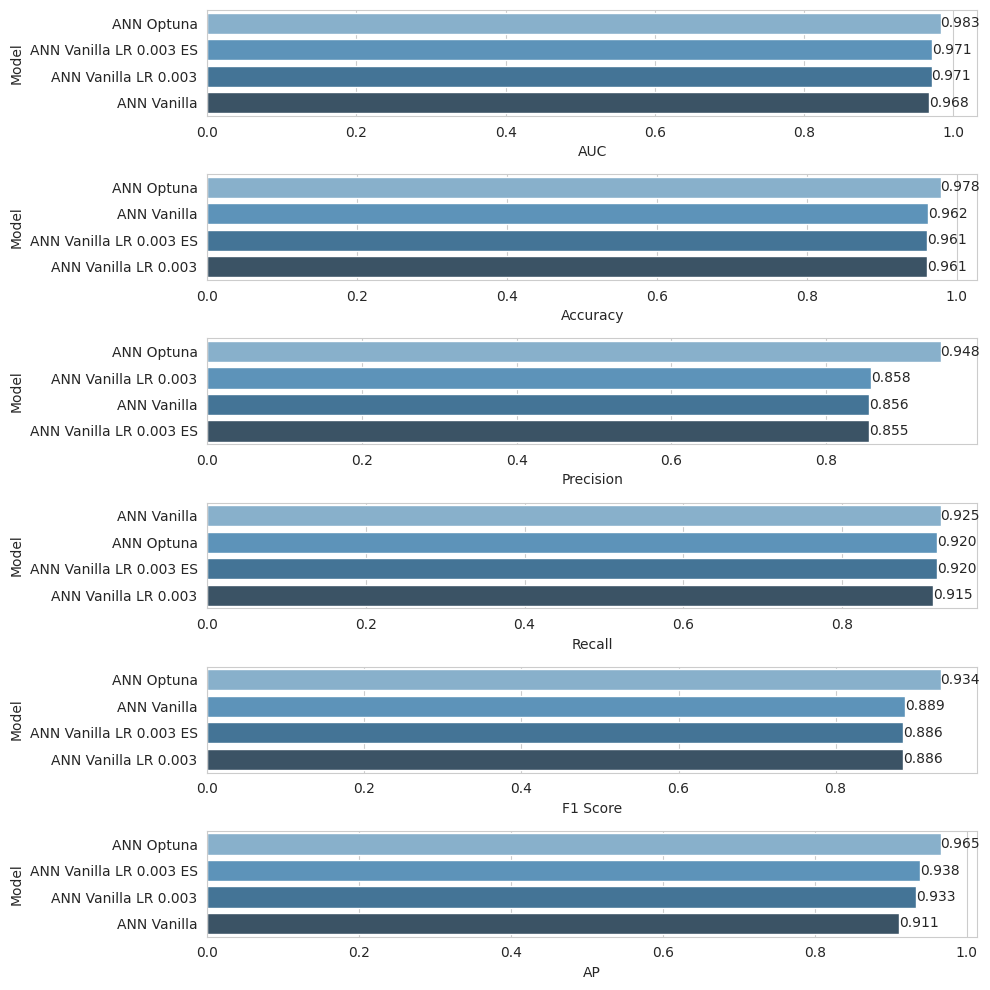

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(611)
compare = compare.sort_values(by="AUC", ascending=False)
ax=sns.barplot(x="AUC", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(612)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(613)
compare = compare.sort_values(by="Precision", ascending=False)
ax=sns.barplot(x="Precision", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(614)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(615)
compare = compare.sort_values(by="F1 Score", ascending=False)
ax=sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d" )
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(616)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d" )
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.tight_layout()
plt.show();


In [ ]:
X_ = df.drop(columns= ["left"])
y_ = df.left

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=seed, stratify = y_)

In [ ]:
with open('logisticregression.pkl', 'rb') as file:
    logisticregression  = pickle.load(file)

with open('randomforest.pkl', 'rb') as file:
    randomforest  = pickle.load(file)

with open('gradientboost.pkl', 'rb') as file:
    gradientboost  = pickle.load(file)

with open('xgboost.pkl', 'rb') as file:
    xgboost  = pickle.load(file)

In [ ]:
models = [logisticregression, randomforest, gradientboost, xgboost]
model_names = ["Logistic Regression", "Random Forest", "Gradient Boost" ,"XGBoost"]

# compare = pd.DataFrame(columns=['Model', 'AUC', 'Accuracy', 'Precision','Recall'])


for model, model_name in zip(models, model_names):
  y_pred_proba = model.predict(X_test_)

  y_pred = ( y_pred_proba > .5).astype("int32")


  # y_pred = model.predict(X_test_)
  auc_score = roc_auc_score(y_test_, y_pred_proba)

  accuracy = accuracy_score(y_test_, y_pred)
  precision = precision_score(y_test_, y_pred)
  recall = recall_score(y_test_, y_pred)
  f1 = f1_score(y_test_, y_pred)

  ap = average_precision_score(y_test_, y_pred_proba)


  compare = compare.append({'Model': model_name,
                              'AUC': auc_score,
                              'Accuracy': accuracy,
                              'Precision': precision,
                              'Recall': recall,
                              'F1 Score': f1,
                              'AP': ap}, ignore_index=True)

compare

,Model,AUC,Accuracy,Precision,Recall,F1 Score,AP
0,ANN Optuna,0.983,0.978,0.948,0.920,0.934,0.965
1,ANN Vanilla LR 0.003 ES,0.971,0.961,0.855,0.920,0.886,0.938
2,ANN Vanilla LR 0.003,0.971,0.961,0.858,0.915,0.886,0.933
3,ANN Vanilla,0.968,0.962,0.856,0.925,0.889,0.911
4,Logistic Regression,0.806,0.782,0.422,0.842,0.562,0.381
5,Random Forest,0.961,0.985,0.981,0.925,0.952,0.920
6,Gradient Boost,0.962,0.986,0.987,0.927,0.956,0.927
7,XGBoost,0.960,0.980,0.951,0.930,0.940,0.896


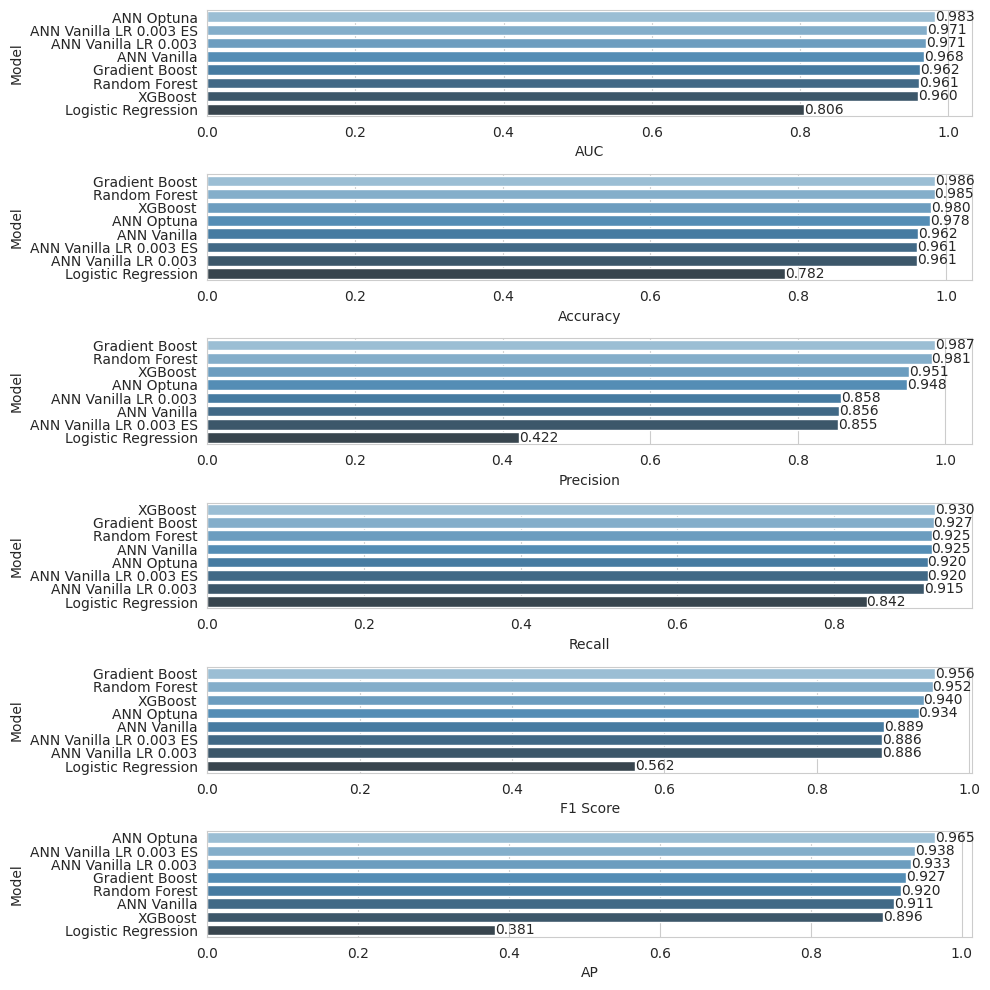

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(611)
compare = compare.sort_values(by="AUC", ascending=False)
ax=sns.barplot(x="AUC", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(612)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(613)
compare = compare.sort_values(by="Precision", ascending=False)
ax=sns.barplot(x="Precision", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(614)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(615)
compare = compare.sort_values(by="F1 Score", ascending=False)
ax=sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d" )
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(616)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d" )
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.tight_layout()
plt.show();

# ✨ PART - 8 Final Model Deployment ✨

In [ ]:
 # retrain  with extended train dataset

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)

In [ ]:
print("X_train shape", X_train.shape)
print("X_test shape",X_test.shape)

X_train shape (10791, 9)
X_test shape (1200, 9)


In [ ]:
pickle.dump(ordinal, open("ordinal_employee_churn", "wb"))
ordinal = pickle.load(open("ordinal_employee_churn", "rb"))

X_train['salary'] = ordinal.fit_transform(X_train[['salary']])
X_test ['salary'] = ordinal.transform(X_test[['salary']])

In [ ]:
pickle.dump(col_transformer, open("scaler_employee_churn", "wb"))
col_transformer = pickle.load(open("scaler_employee_churn", "rb"))

# using col_transformer for one hot encoding to train_datas
transformed_data = pd.DataFrame(col_transformer.fit_transform(X_train))
transformed_data.columns = col_transformer.get_feature_names_out(input_features=X_train.columns )
transformed_data.columns =  [col.split('__')[-1] for col in transformed_data.columns]
X_train = transformed_data
X_train.head()

,departments_RandD,departments_accounting,departments_hr,departments_management,departments_marketing,departments_product_mng,departments_sales,departments_support,departments_technical,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary
0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.945,0.188,0.600,0.551,0.500,1.000,1.000,0.500
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.901,0.625,0.200,0.472,0.125,0.000,0.000,0.500
2,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.363,0.828,0.800,0.430,0.375,1.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.582,0.438,0.400,0.416,0.000,0.000,0.000,0.500
4,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.593,0.906,0.200,0.355,0.125,0.000,0.000,0.500


In [ ]:
# using col_transformer for one hot encoding to test_dataset
transformed_data = pd.DataFrame(col_transformer.transform(X_test))
transformed_data.columns = col_transformer.get_feature_names_out(input_features=X_test.columns )
transformed_data.columns =  [col.split('__')[-1] for col in transformed_data.columns]
X_test = transformed_data
X_test.head()

,departments_RandD,departments_accounting,departments_hr,departments_management,departments_marketing,departments_product_mng,departments_sales,departments_support,departments_technical,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.560,0.422,0.600,0.799,0.125,0.000,0.000,0.000
1,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.011,0.750,0.600,0.967,0.375,0.000,0.000,0.500
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.901,0.109,0.400,0.098,0.375,1.000,0.000,0.500
3,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.473,0.688,0.200,0.729,0.250,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.747,0.094,0.400,0.009,0.000,0.000,0.000,0.000


In [ ]:
print("X_train shape", X_train.shape)
print("X_test shape",X_test.shape)

X_train shape (10791, 17)
X_test shape (1200, 17)


## 8.1. Final Model

In [ ]:
best_params

{'n_units1': 72,
 'n_units2': 34,
 'n_units3': 16,
 'n_units4': 13,
 'optimizer': keras.src.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.000375821142488931,
 'w0': 0.5019737775357155,
 'w1': 0.6318714392969568}

In [ ]:
unit1, unit2, unit3, unit4, optimizer, lr, w0, w1 = best_params.values()
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(unit3, activation="relu"))
model.add(Dense(unit4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall"])

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=[early_stop],
          class_weight = {0: w0, 1: w1} )

Epoch 1/1000
169/169 [==============================] - 2s 6ms/step - loss: 0.2749 - accuracy: 0.8339 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4072 - val_accuracy: 0.8342 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/1000
169/169 [==============================] - 1s 4ms/step - loss: 0.2250 - accuracy: 0.8339 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3575 - val_accuracy: 0.8342 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/1000
169/169 [==============================] - 1s 4ms/step - loss: 0.2036 - accuracy: 0.8340 - precision: 0.6000 - recall: 0.0017 - val_loss: 0.3176 - val_accuracy: 0.8350 - val_precision: 0.6000 - val_recall: 0.0151
Epoch 4/1000
169/169 [==============================] - 1s 4ms/step - loss: 0.1854 - accuracy: 0.8450 - precision: 0.6374 - recall: 0.1540 - val_loss: 0.2926 - val_accuracy: 0.8667 - val_precision: 0.6726 - val_recall: 0.3819
Epoch 5/1000
169/169 [==============================] - 1s 4ms/s

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail()

,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
141,0.042,0.978,0.949,0.916,0.107,0.970,0.905,0.915
142,0.042,0.979,0.952,0.920,0.097,0.973,0.928,0.905
143,0.042,0.980,0.954,0.922,0.098,0.974,0.972,0.869
144,0.042,0.979,0.952,0.917,0.096,0.973,0.933,0.905
145,0.042,0.979,0.951,0.918,0.097,0.974,0.933,0.910


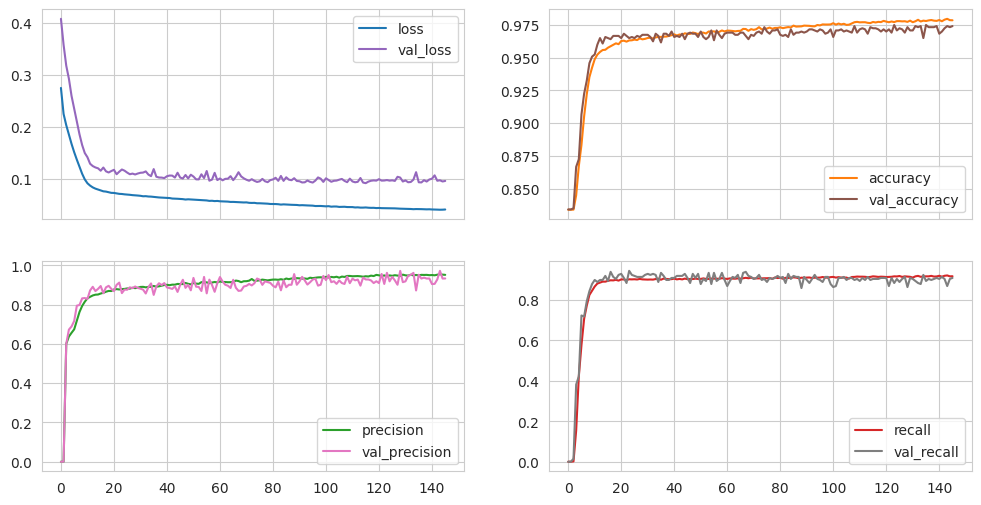

In [ ]:
loss_df.plot(subplots=[['loss','val_loss'],
                       ['accuracy','val_accuracy'],
                       ['precision', 'val_precision'],
                       ['recall', 'val_recall']],
                       layout=(2,2),
                       figsize=(12,6));

In [ ]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
print("test loss: ", loss)
print("test accuracy: ", accuracy)
print("test precision ", precision)
print("test recall: ", recall)

test loss:  0.09254588931798935
test accuracy:  0.9725000262260437
test precision  0.9278350472450256
test recall:  0.9045225977897644


In [ ]:
loss, accuracy, precision, recall = model.evaluate(X_train, y_train, verbose=0)
print("train loss: ", loss)
print("train accuracy: ", accuracy)
print("train precision ", precision)
print("train recall: ", recall)

train loss:  0.07386533170938492
train accuracy:  0.9794272780418396
train precision  0.9574592113494873
train recall:  0.9168526530265808


In [ ]:
con_matrix(X_train, X_test, y_train, y_test, model, 'Best Model')

38/38 [==============================] - 0s 2ms/step
Best Model - Test Confusion Matrix
**************************************************
[[987  14]
 [ 19 180]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1001
           1       0.93      0.90      0.92       199

    accuracy                           0.97      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.97      0.97      0.97      1200


338/338 [==============================] - 1s 2ms/step
Best Model - Train Confusion Matrix
**************************************************
[[8926   73]
 [ 149 1643]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8999
           1       0.96      0.92      0.94      1792

    accuracy                           0.98     10791
   macro avg       0.97      0.95      0.96     10791
weighted avg       0.98      0.98      0.98     10791



In [ ]:
y_pred_proba = model.predict(X_test)
y_pred_proba_train = model.predict(X_train)

y_pred =  (model.predict(X_test) > .5).astype("int32")
y_pred_train =  (model.predict(X_train) > .5).astype("int32")

print("Average Test Precision Score:  ", average_precision_score(y_test, y_pred_proba))
print("Average Train Precision Score: ", average_precision_score(y_train, y_pred_proba_train))
print("F1 Test Precision Score: ", f1_score(y_test, y_pred))
print("F1 Train Precision Score:",f1_score(y_train, y_pred_train))
print("Recall Test Precision Score: ", recall_score(y_test, y_pred))
print("Recall Train Precision Score:",recall_score(y_train, y_pred_train))

338/338 [==============================] - 1s 2ms/step
Average Test Precision Score:   0.9593409624038663
Average Train Precision Score:  0.9709935715515776
F1 Test Precision Score:  0.916030534351145
F1 Train Precision Score: 0.9367160775370582
Recall Test Precision Score:  0.9045226130653267
Recall Train Precision Score: 0.9168526785714286


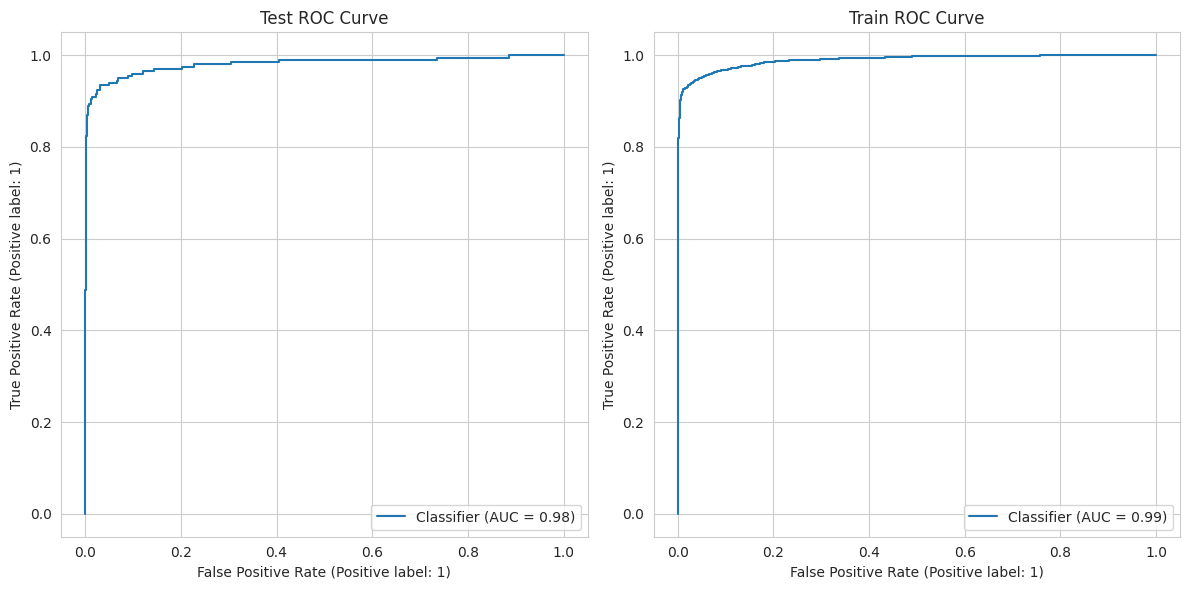

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# ROC curve for the test data
RocCurveDisplay.from_predictions(y_test, y_pred_proba, ax=axes[0])
axes[0].set_title('Test ROC Curve')

# ROC curve for the train data
RocCurveDisplay.from_predictions(y_train, y_pred_proba_train, ax=axes[1])
axes[1].set_title('Train ROC Curve')
plt.tight_layout();

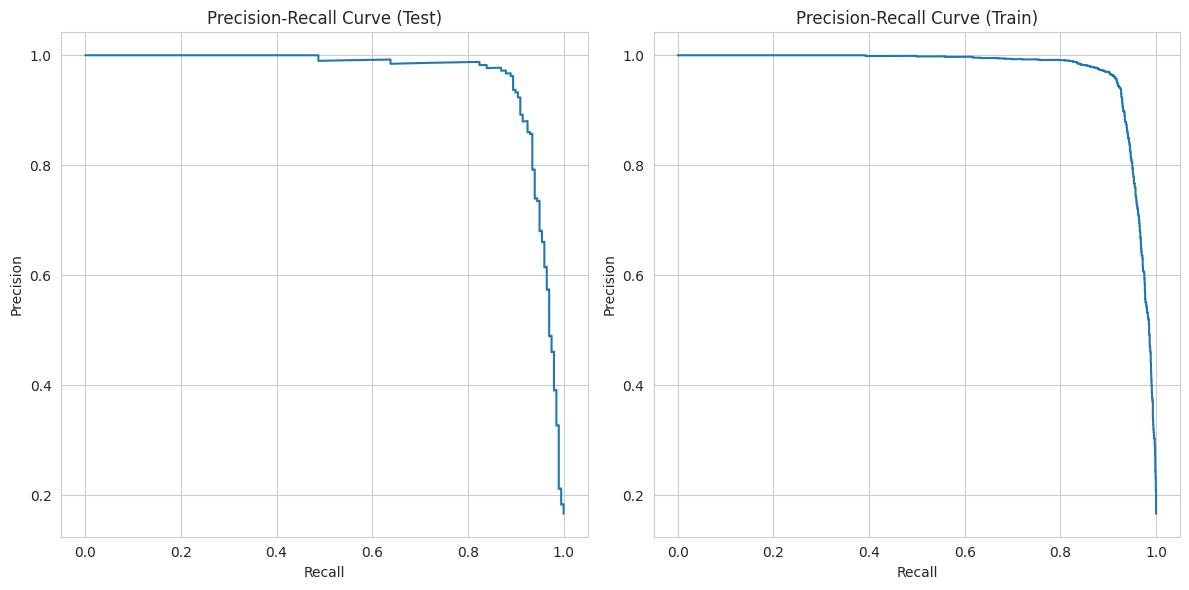

In [ ]:
plt.figure(figsize=(12, 6))

# Precision-recall curve for the test data
precisions_test, recalls_test, thresholds_test = precision_recall_curve(y_test, y_pred_proba)
plt.subplot(1, 2, 1)  # Arrange two plots side by side, this is the first plot
plt.plot(recalls_test, precisions_test, label='ANN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test)')

# Precision-recall curve for the train data
precisions_train, recalls_train, thresholds_train = precision_recall_curve(y_train, y_pred_proba_train)
plt.subplot(1, 2, 2)  # Arrange two plots side by side, this is the second plot
plt.plot(recalls_train, precisions_train, label='ANN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Train)')

plt.tight_layout();

##  8.2. Prediction
- Make a demo prediction

In [ ]:
df_predict = df.sample(n=5, random_state=seed)
df_predict.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
396,0.090,0.790,6,293,5,0,1,0,sales,low
3098,0.740,0.960,4,154,4,0,0,0,support,medium
9322,0.810,0.970,4,212,2,0,0,0,sales,low
357,0.370,0.540,2,149,3,0,1,0,support,low
1323,0.100,0.770,6,272,4,0,1,0,accounting,low


In [ ]:
X_new = df_predict.drop(['left'], axis=1)
y_new = df_predict['left']

In [ ]:
X_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary
396,0.090,0.790,6,293,5,0,0,sales,low
3098,0.740,0.960,4,154,4,0,0,support,medium
9322,0.810,0.970,4,212,2,0,0,sales,low
357,0.370,0.540,2,149,3,0,0,support,low
1323,0.100,0.770,6,272,4,0,0,accounting,low


In [ ]:
y_new.head()

396     1
3098    0
9322    0
357     1
1323    1
Name: left, dtype: int64

In [ ]:
#ordinal encoding for salary column
X_new['salary'] = ordinal.transform(X_new[['salary']])

X_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary
396,0.090,0.790,6,293,5,0,0,sales,0.000
3098,0.740,0.960,4,154,4,0,0,support,1.000
9322,0.810,0.970,4,212,2,0,0,sales,0.000
357,0.370,0.540,2,149,3,0,0,support,0.000
1323,0.100,0.770,6,272,4,0,0,accounting,0.000


In [ ]:
transformed_data = pd.DataFrame(col_transformer.transform(X_new))
transformed_data.columns = col_transformer.get_feature_names_out(input_features=X_new.columns )

transformed_data.columns =  [col.split('__')[-1] for col in transformed_data.columns]
X_new = transformed_data
X_new.head()

,departments_RandD,departments_accounting,departments_hr,departments_management,departments_marketing,departments_product_mng,departments_sales,departments_support,departments_technical,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary
0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.672,0.800,0.921,0.375,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.714,0.938,0.400,0.271,0.250,0.000,0.000,0.500
2,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.791,0.953,0.400,0.542,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.308,0.281,0.000,0.248,0.125,0.000,0.000,0.000
4,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.011,0.641,0.800,0.822,0.250,0.000,0.000,0.000


In [ ]:
# Final Model selection :optuna with Early Stop
  # 'n_units1': 72,
  # 'n_units2': 34,
  # 'n_units3': 16,
  # 'n_units4': 13,
  # 'optimizer': keras.src.optimizers.rmsprop.RMSprop,
  # 'learning_rate': 0.000375821142488931,
  # 'w0': 0.5019737775357155,
  # 'w1': 0.6318714392969568


prediction = pd.DataFrame(model.predict(X_new) > 0.5, columns=['predict']).astype("int32")

pd.concat([df_predict.reset_index(drop=True), prediction.reset_index(drop=True)], axis=1)

1/1 [==============================] - 0s 34ms/step


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary,predict
0,0.090,0.790,6,293,5,0,1,0,sales,low,1
1,0.740,0.960,4,154,4,0,0,0,support,medium,0
2,0.810,0.970,4,212,2,0,0,0,sales,low,0
3,0.370,0.540,2,149,3,0,1,0,support,low,1
4,0.100,0.770,6,272,4,0,1,0,accounting,low,1


## 8.3. Save and Export the Best Model

In [ ]:
model.save('best_hr_churn.h5')

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___